## C Class project - Finbee - Predicting default on P2P loans

Project details - https://github.com/mokahaiku/toai_workshops
Data [Finbee.lt](https://www.finbee.lt/apie-mus/paskolu-portfelio-eksportas/)

When investing in P2P loans everyone wants to reduce risk. 

With help of ML we can try to build models and predict which users are good investments and which are not.



**Requirements**
* Do exploratory data analysis. (Ok vs Default loans)
* Do feature engineering.
* Do feature preprocessing.
* Build a machine learning model.
* Explore your model results.

**Bonus Points**
* Move your final model to a Python module.
* Compare multiple machine learning models.
* Do hyperparameter tuning.
* Deploy the model on your own machine.
* Deploy the model on external service.

**To do**:
* Use a pipeline
* Data imputation etc.
* Analyse feature importance in models


### Importing needed modules

In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime
from datetime import date
import holidays

import warnings
warnings.filterwarnings('ignore')

### Reading file

In [552]:
data_xls = pd.read_excel('loans.xlsx', index_col=None)
data_xls.to_csv('loans.csv', encoding='utf-8', index=False)
df = pd.read_csv('loans.csv', parse_dates=['creation_date'])
pd.set_option('display.max_columns', None)  

### Exploring data


**listing_id**	Unikalus numeris, kuris suteikiamas kiekvienai paskolai.

**creation_date**	Paskolos paraiškos pateikimo data.

**loan_paid_date**	Paskolos išmokėjimo data.

**first_installement_date**	Pirmos mėnesinės įmokos data.

**loan_paid_status**	Paskolos išmokėjimo statusas (1 – paskola išmokėta, 0 – paskola dar neišmokėta).

**confirm_status**	Paskolos statusas (1 – paskolos gavėjas priėmė paskolos pasiūlymą, 3 – paskola pilnai grąžinta).

**username**	Paskolos gavėjo vartotojo vardas.

**listing_title**	Unikalus paskolos pavadinimas.

**listing_category**	Paskolos paskirtis.

**credit_score**	Paskolos gavėjui suteiktas kredito rizikos balas.

**job_loss_insurance**	Paskolos gavėjui netekus darbo ne savo noru ADB „Gjensidige“ mokės paskolos įmokas iki 6 mėn. (1 – galioja draudimas nuo priverstinio nedarbo, 0 – draudimas nuo priverstinio nedarbo negalioja).

**loan_amount**	Paskolos suma.

**loan_period**	Paskolos terminas mėnesiniais.

**effective_rate**	Paskolos palūkanų norma, kurią paskolos gavėjas moka investuotojams.

**preferred_rate**	Pageidaujama paskolos gavėjo palūkanų norma.

**amount_outstanding**	Likusi negrąžinta paskolos dalis šiai dienai.

**monthly_installment**	Mėnesinė paskolos įmoka.

**principal_repaid**	Grąžinta paskolos dalis.

**interest_paid**	Paskolos gavėjo sumokėtų palūkanų suma.

**arrears**	Visų vėluojančių paskolos įmokų suma.

**loan_status**	Paskolos būsena (ok – nėra vėluojančių įmokų, late – praleista viena paskolos įmoka, arrears – praleistos dvi 

paskolos įmokos, default – praleistos trys ir daugiau paskolos įmokos).

**type**	Paskolos tipas (B – paskola sufinansuota aukcione).

**gender**	Paskolos gavėjo lytis.

**post_town**	Miestas, kuriame gyvena paskolos gavėjas.

**age**	Paskolos gavėjo amžius.

**education**	Paskolos gavėjo išsilavinimas.

**employment_status**	Paskolos gavėjo darbo sutarties tipas paskolos išdavimo momentu.

**occupation**	Paskolos gavėjo užimamos pareigos paskolos išdavimo momentu.

**employ_how_long**	Paskolos gavėjo darbo trukmė mėnesiais dabartinėje darbovietėje.

**years_working_in_total**	Paskolos gavėjo darbo stažas metais.

**dependants**	Nepilnamečių vaikų/išlaikytinių skaičius.

**marital_status**	Paskolos gavėjo vedybininis statusas.

**credit_check_date**	Paskolos gavėjo mokumo vertinimo data.

**monthly_income**	Paskolos gavėjo namų ūkio pajamos, kurias jis gavo paskolos suteikimo metu. Jeigu paskolos gavėjas nėra susituokęs, tuomet namų ūkio pajamas sudaro tik jo vieno pajamos.

**monthly_expenses**	Paskolos gavėjo namų ūkio mokamos kitų paskolų įmokos. Jeigu paskolos gavėjas nėra susituokęs, tuomet namų ūkio paskolų įmokas sudaro tik jo vieno paskolų įmokos.

**available_income**	Grynosios pajamos apskaičiuojamos pagal formulę: namų ūkio mėnesio pajamos – namų ūkio turimų kitų paskolų įmokos.

**dti**	Visų paskolų įmokų ir pajamų santykis apskaičiuojamas pagal formulę: namų ūkio turimų ir naujų paskolų mėnesinės įmokos / namų ūkio grynosios mėnesio pajamos.

**outstanding_debts**	Esama nepadengta skola bet kuriam iš kreditorių, komunalinių, telekomunikacinių paslaugų tiekėjų ir pan., apie kurią buvo informuotas kreditų biuras.

**last_debt_date**	Data, kada buvo registruota paskutinė skola bet kuriam iš kreditorių, komunalinių, telekomunikacinių paslaugų tiekėjų ir pan., apie kurią buvo informuotas kreditų biuras.

In [553]:
df 

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date
0,32692,2019-09-04,2019-09-05,2019-10-05,1,1,Raimonda98,"""32692-Automobiliui",Car,D,0,3305,36,0.2600,0.26,3305.00,150.63,0.00,0.00,0.0,ok,FR,Female,Prienų r.,21,Vocational education,Employed,Rušiuotojas / Sorting operator,6,3,0,Single,2019-09-04 00:00:00,503,0,503,0.2995,0,-
1,32691,2019-09-04,2019-09-05,2019-10-05,1,1,bkar,"""32691-Vartojimui",Other Purposes,D,0,1900,36,0.2600,0.26,1900.00,86.59,0.00,0.00,0.0,ok,FR,Male,Joniškio r.,25,Vocational education,Employed,Mechanikas / Mechanic,3,4,0,Single,2019-09-04 00:00:00,345,17,328,0.3003,0,2018-01-04 00:00:00
2,32687,2019-09-04,2019-09-05,2019-10-05,1,1,vl771013,"""32687-Vartojimui",Other Purposes,C,0,665,12,0.1900,0.19,665.00,63.79,0.00,0.00,0.0,ok,FR,Female,Vilnius,41,Graduate,Employed,Vadybininkė / Manager,60,6,1,Married,2019-09-04 00:00:00,1060,197,863,0.2460,0,2016-11-30 00:00:00
3,32674,2019-09-04,2019-09-04,2019-10-04,1,1,karturas,"""32674-Vartojimui",Other Purposes,B,0,1040,12,0.1300,0.13,1040.00,96.26,0.00,0.00,0.0,ok,FR,Male,Vilnius,26,High school,Employed,Vairuotojas / Driver,36,7,1,Married,2019-09-04 00:00:00,484,0,484,0.1989,0,-
4,32666,2019-09-04,2019-09-05,2019-10-05,1,1,RasaMeska,"""32666-Vartojimui",Other Purposes,B,0,2830,24,0.1300,0.13,2830.00,143.81,0.00,0.00,0.0,ok,FR,Female,Panevėžys,33,Post graduate,Employed,Socialinė darbuotoja / Social worker,15,3,2,Married,2019-09-04 00:00:00,849,21,828,0.1941,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,38,2015-08-19,2015-08-25,2015-09-25,1,3,Elegi,"""Paskolu refinansavimui",Consolidation of Other Loans,D,0,2250,18,0.3156,0.30,0.00,158.52,2250.01,603.37,0.0,ok,B,Female,"Trakų rajonas, Bražuolės kaimas",40,Graduate,Employed,Barmenė,72 or more,12,2,Married,-,420,0,420,0.3626,0,-
9010,28,2015-08-18,2015-08-21,2015-09-21,1,3,egle,"""Persiskolinti",Consolidation of Other Loans,C,0,2000,27,0.2583,0.25,0.00,1277.55,2000.01,458.90,0.0,ok,B,Female,Šilutė,36,Post graduate,Employed,Valstybės tarnautoja/Public servant,48,8,0,Single,2015-11-17 00:00:00,900,127,773,0.2496,0,-
9011,3,2015-08-13,2015-08-20,2015-09-20,1,3,Algirdas,"""Vartojimo paskola, vartojimui, mokinimosi išl...",Other Purposes,D,0,1300,24,0.2525,0.25,0.00,690.85,1299.99,294.96,0.0,ok,B,Male,Kaunas,29,Post graduate,Employed,Inžinierius-projektuotojas,9,2,0,Single,-,510,14,496,0.1635,0,-
9012,2,2015-08-12,2015-08-28,2015-09-27,1,1,Bitute,"""Refinansavimas",Consolidation of Other Loans,C,0,2700,54,0.2582,0.20,473.87,85.03,2226.13,1855.32,0.0,ok,B,Female,Vilnius,33,Post graduate,Employed,Specialistė / Specialist,60,10,0,Single,-,590,0,590,0.1292,0,-


In [554]:
#Remove rows with missing values
df.isnull().sum()
df = df.dropna()

#Keep only rows with 'ok' & 'default' loan_status
df = df[(df['loan_status'] == 'ok') | (df['loan_status'] == 'default')]


#Latest defaulted person '2019-06-01', remove recent loans
df = df[df['creation_date'] < '2019-06-02']
df.shape

(7690, 39)

In [555]:
ok_df = df[df['loan_status'] == 'ok']
default_df = df[df['loan_status'] == 'default']

In [556]:
def count_plot(feature, rotation = 0):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=feature,data=df[df.loan_status == 'ok'], order=df[feature].value_counts().index );
    ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15, rotation=rotation);
    ax.set_title("Good loans by " + feature, fontsize=20,)

    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height(), \
                str(round((i.get_height()),)), fontsize=15, color='black')

    #2
    plt.subplot(1,2,2)   
    ax = sns.countplot(x=feature,data=df[df.loan_status == 'default'],order=df[feature].value_counts().index);
    ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15,  rotation=rotation);
    ax.set_title("Bad loans by " + feature, fontsize=20)

    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height(), \
                str(round((i.get_height()),)), fontsize=15, color='black')
        

def count_plot_unordered(feature):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1) 
    ax = sns.countplot(x=feature,data=df[df.loan_status == 'ok']);
    ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
    ax.set_title("Good loans by " + feature, fontsize=20)


    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height(), \
                str(round((i.get_height()),)), fontsize=15, color='black')

    plt.subplot(1,2,2)    
    ax = sns.countplot(x=feature,data=df[df.loan_status == 'default']);
    ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
    ax.set_title("Bad loans by " + feature, fontsize=20)


    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height(), \
                str(round((i.get_height()),)), fontsize=15, color='black')
        
        
def violin_plot(x,y,data,title):
    plt.figure(figsize=(15,20))
    plt.subplot(4,1,1)
    ax = sns.violinplot(x=x, y=y, data=data)
    ax.set_title(title, fontsize=20)
    

def bad_loans_percent(feature, rotation = 0, df = df):
    #initializitaion of variables
    data = []
    labels = []
    
    
    #main function which returns % of bad loans per unique label
    values = df[feature].value_counts()
    
    for index, index_val in values.iteritems():
        loan_status_values = df[df[feature]==index].loan_status.value_counts()

        for index2, val in loan_status_values.iteritems():
            if index2 == 'default':
                data.append(round(val*100/index_val, 2))
                labels.append(index)
    
    #Turn data into df for plotting        
    df_to_plot = pd.DataFrame({'Labels':labels, 'Values':data})
    
    
    plt.figure(figsize=(20,10))
    ax = sns.barplot(x="Labels", y='Values', data=df_to_plot)
    ax.set_title("Bad loans % - by " + feature, fontsize=20)
    ax.set_ylabel('% of bad loans')
    ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15, rotation=rotation);
    ax.set_xlabel(feature + ' Labels')
    
    for i in ax.patches:
        ax.text(i.get_x()+0.25, i.get_height(), \
                str(i.get_height(),)+'%', fontsize=20, color='black')


def hypothesis_graph(feature, dataframe, title):
    data = []
    labels = []

    values = dataframe[feature].value_counts()

    for index, index_val in values.iteritems():
            loan_status_values = dataframe[dataframe[feature]==index].loan_status.value_counts()

            for index2, val in loan_status_values.iteritems():
                if index2 == 'default':
                    data.append(round(val*100/index_val, 2))
                    labels.append(index)

    df_to_plot = pd.DataFrame({'Labels':labels, 'Values':data})


    plt.figure(figsize=(20,10))
    ax = sns.barplot(x="Labels", y='Values', data=df_to_plot)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel('% of bad loans')
    ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
    ax.set_xlabel('Labels')

    for i in ax.patches:
        ax.text(i.get_x()+0.25, i.get_height(), \
                str(i.get_height(),)+'%', fontsize=20, color='black')

### Exploratory data analysis EDA

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


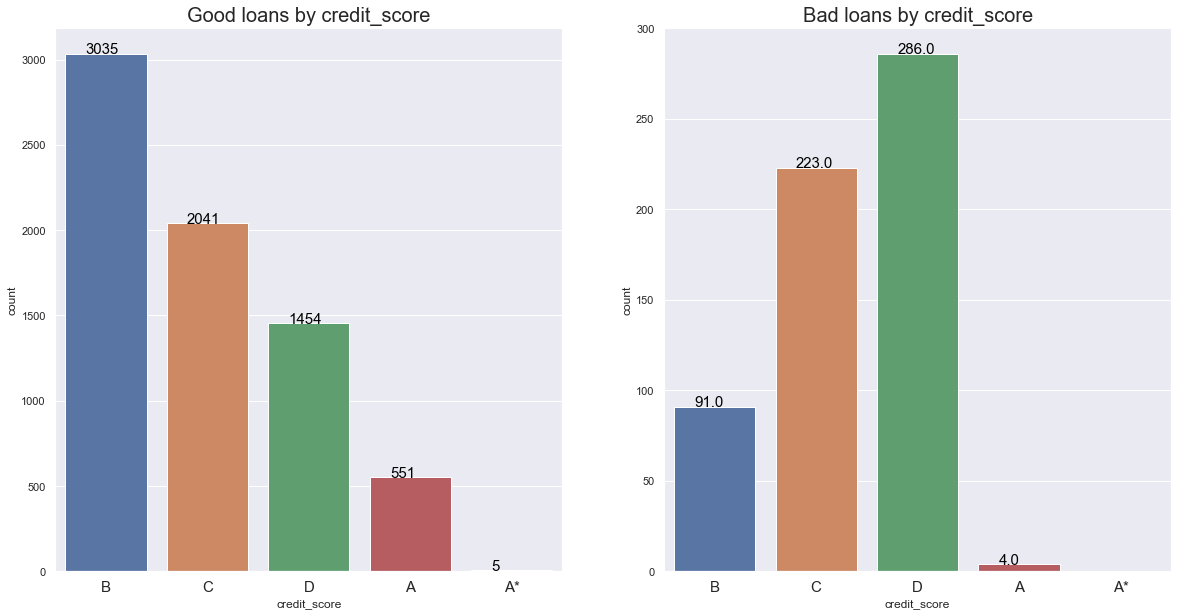

In [559]:
count_plot('credit_score',)

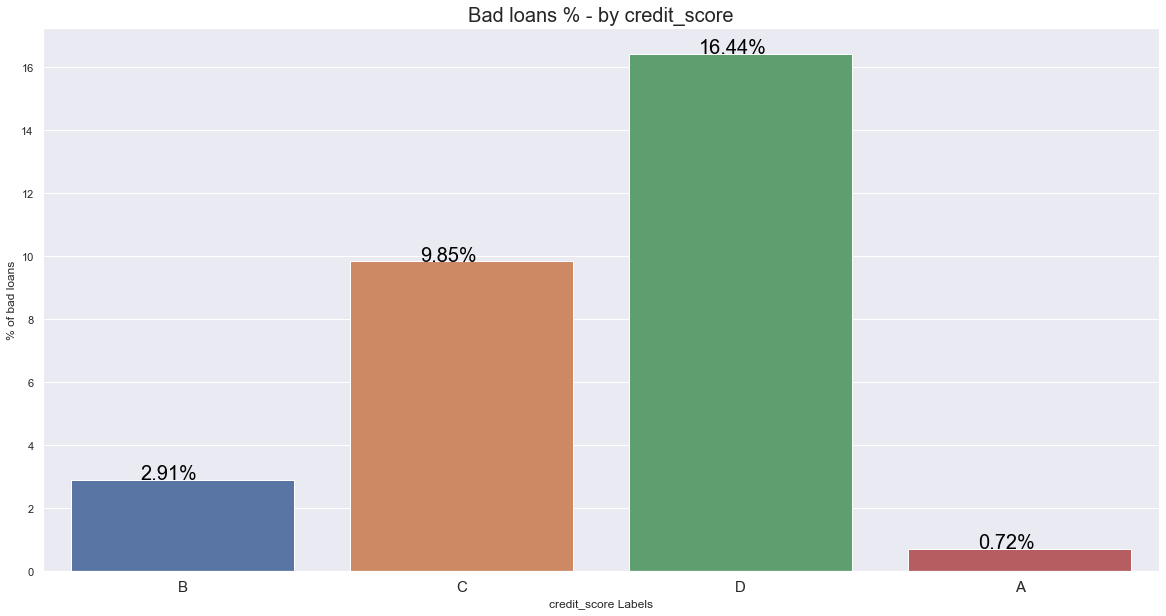

In [560]:
bad_loans_percent('credit_score')

## Avoid
* D - (16.44% of D loans) 
* C - (9.85% of C loans)

## Good ones:
* B - (2.91% of B loans)
* A - (0.72% of A loans)

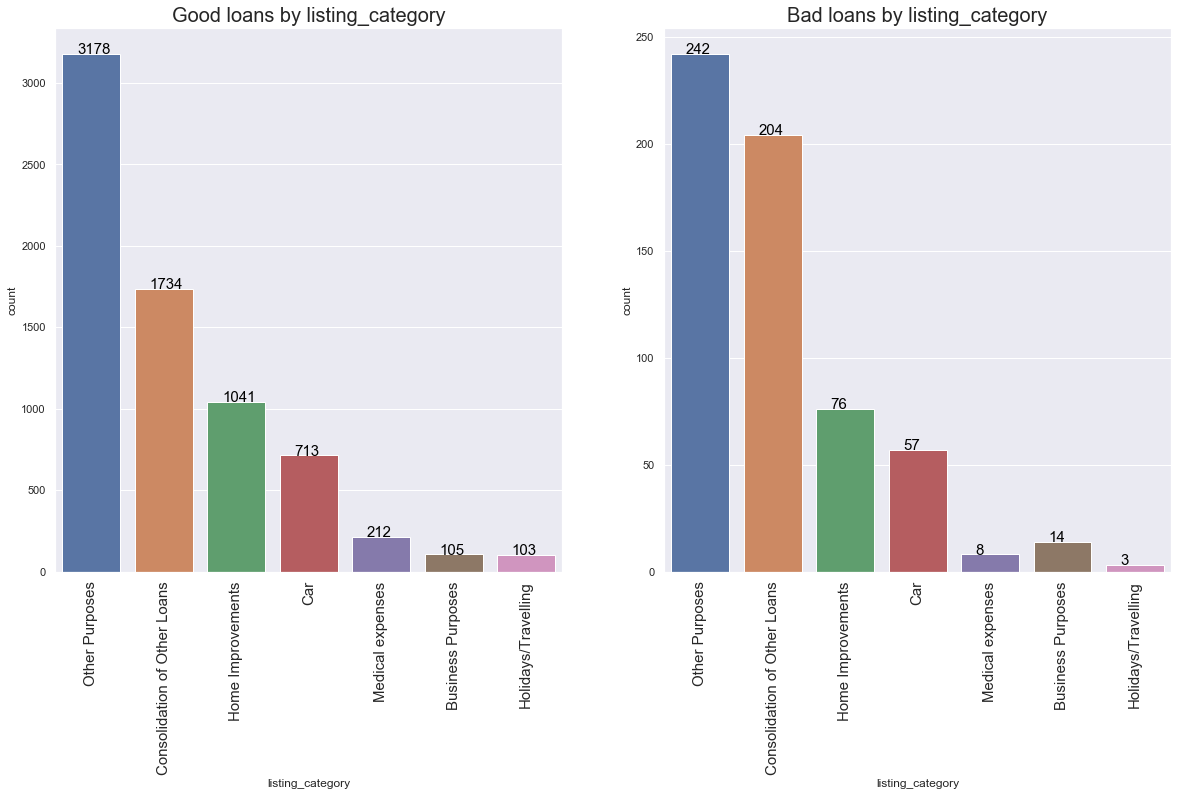

In [561]:
count_plot('listing_category', 90)

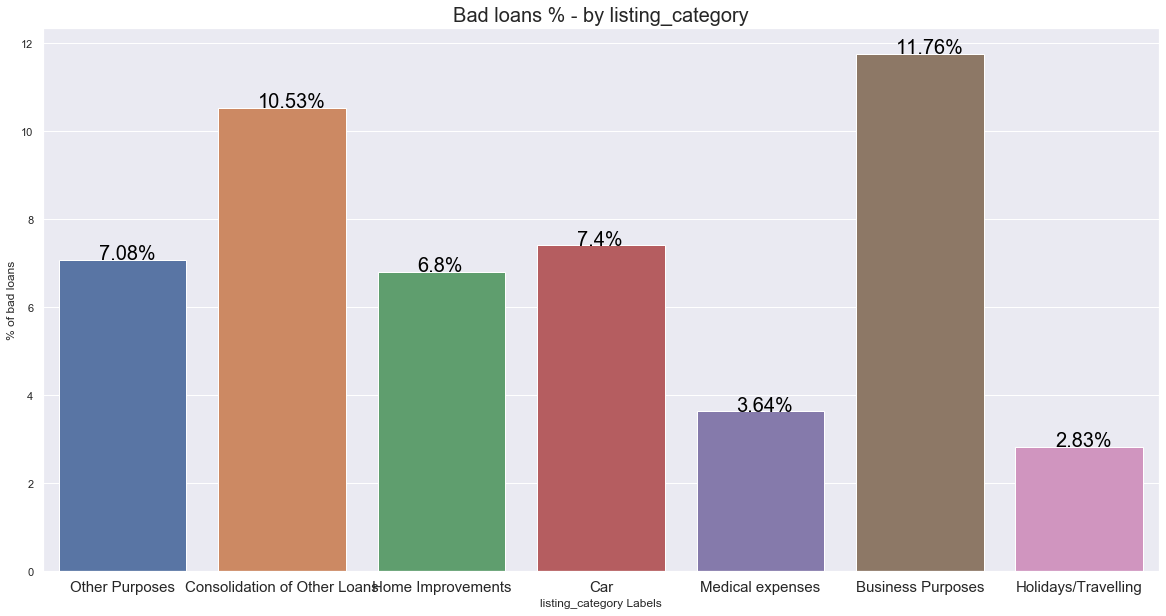

In [562]:
bad_loans_percent('listing_category')

## Avoid:
* "Business Purposes" loans 11.76% from all default
* "Consolidation of other loans" 10.53% from all default

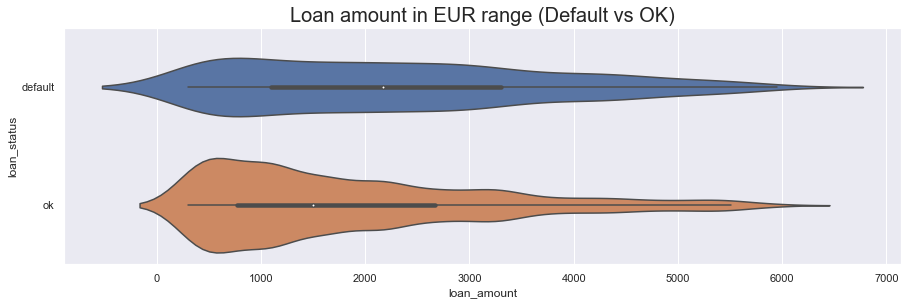

In [563]:
violin_plot('loan_amount','loan_status',df[df['loan_amount']<6000],'Loan amount in EUR range (Default vs OK)' )

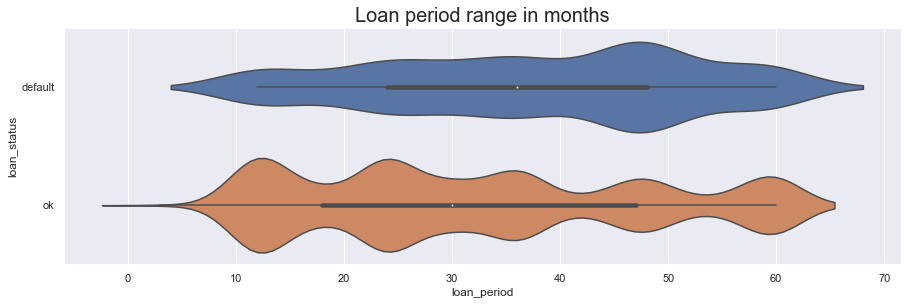

In [564]:
violin_plot('loan_period',"loan_status",df,'Loan period range in months')

Defaulting clients, prefer longer periods.

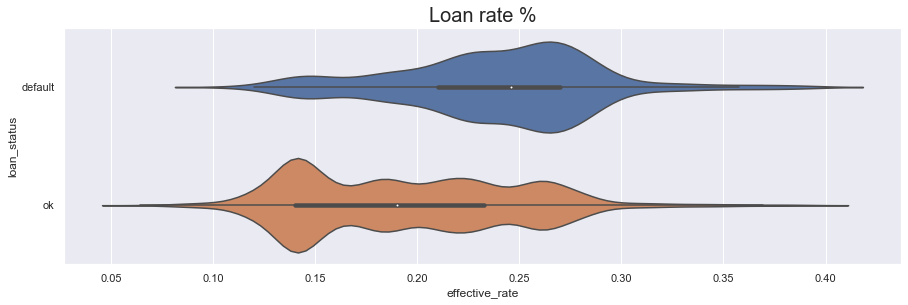

In [565]:
violin_plot('effective_rate',"loan_status",df,'Loan rate %')

Defaulting clients are mostly those whos Loan rate < 20% +.

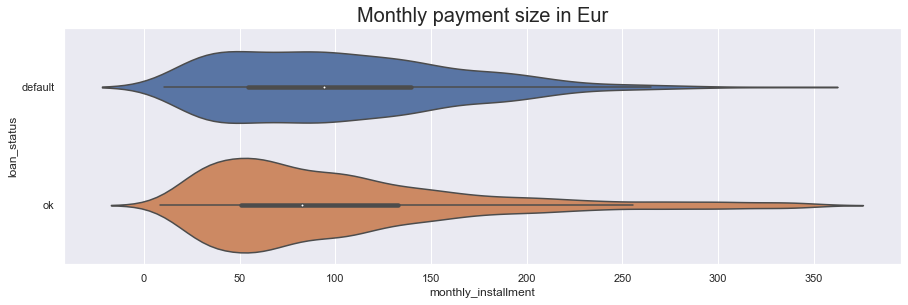

In [566]:
violin_plot('monthly_installment','loan_status',df[df['monthly_installment'] < 350],'Monthly payment size in Eur')

Text(0.5, 1.0, 'Default loans by Gender ')

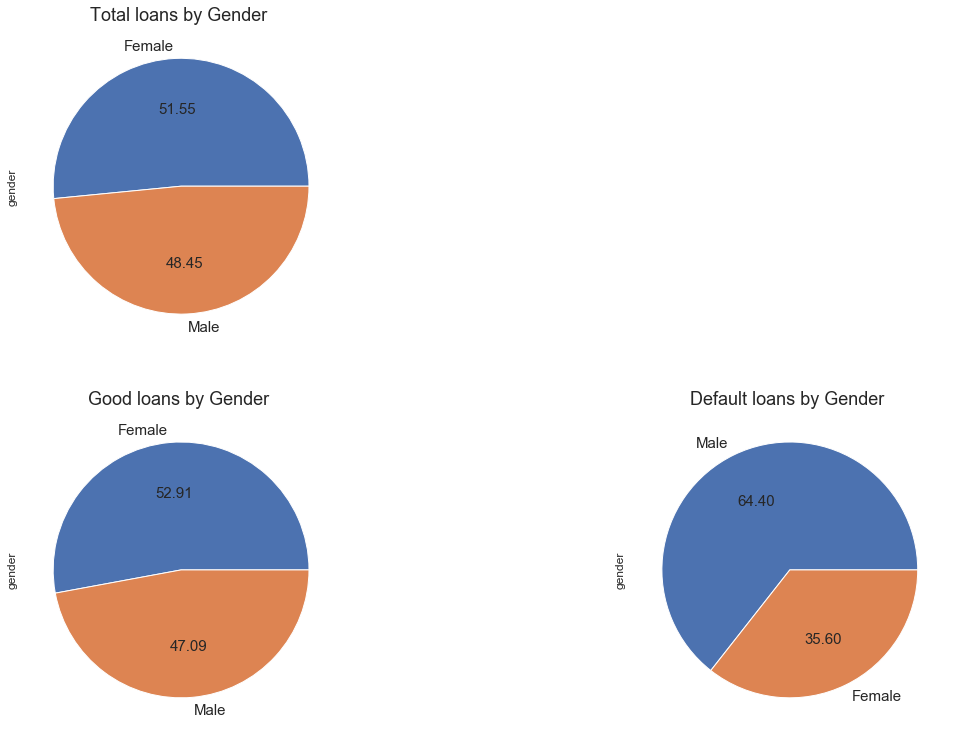

In [567]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
df['gender'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Total loans by Gender ", fontsize=18 )
plt.subplot(3,2,3)
ok_df['gender'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Good loans by Gender ", fontsize=18 )
plt.subplot(3,2,4)
default_df['gender'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Default loans by Gender ", fontsize=18 )

Text(0.5, 1.0, 'Age distribution of loan takers')

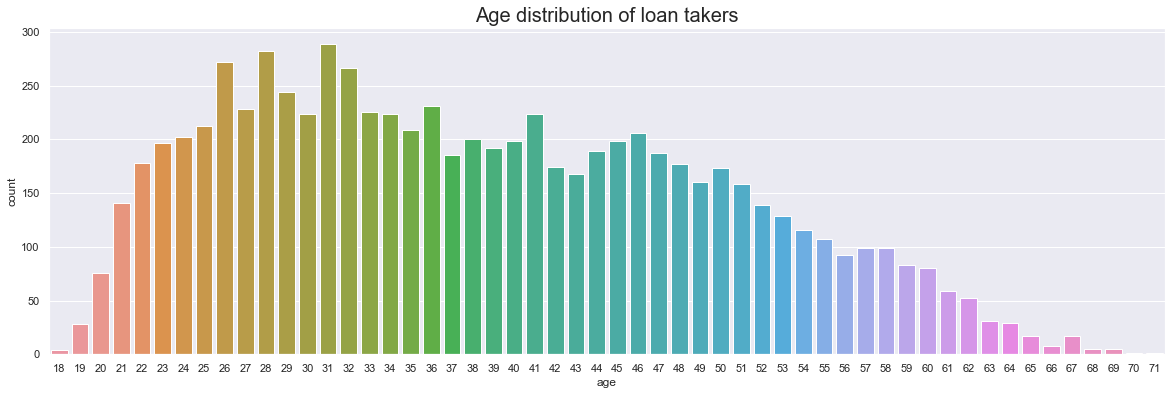

In [568]:
plt.figure(figsize=(20,6))
order = sorted(df['age'].unique())
ax3 = sns.countplot(x="age", data=df)
ax3.set_title("Age distribution of loan takers", fontsize=20)

## Men are more risky than women. 64.4% vs 35.6%

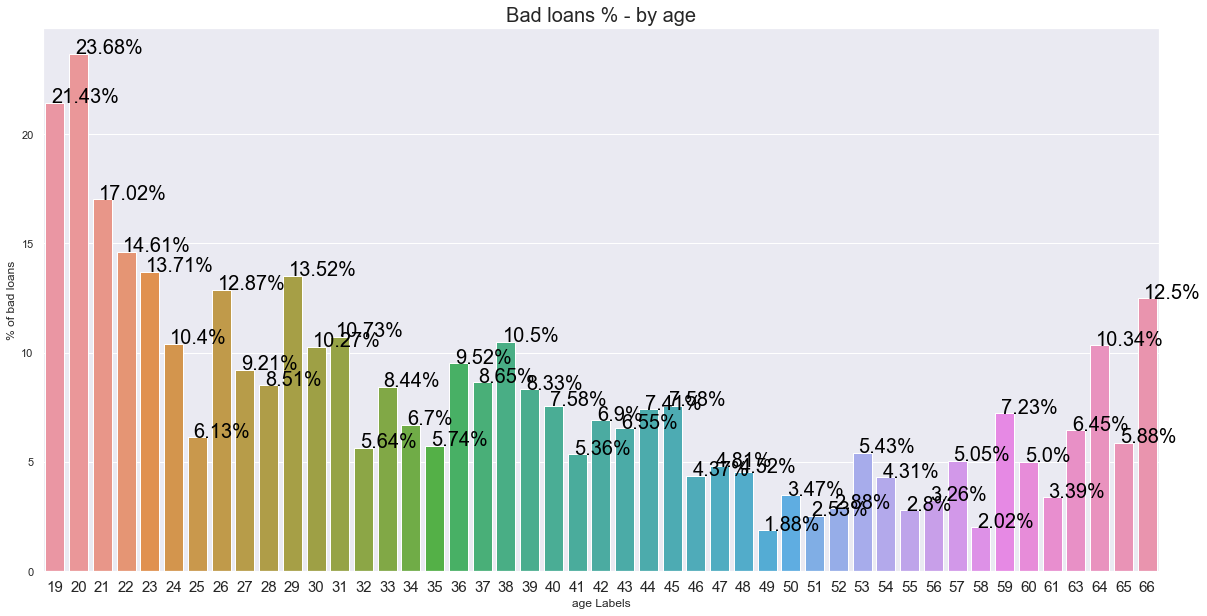

In [572]:
bad_loans_percent('age')

### Which are top 10 the most risky years, with largest Default %?
- High school (Vidurinis išsilavinimas)
- Vocationals (Profesini išsilavinimas)
- Graduate (Bakalauras)
- Post Gradudate (Magistras, Daktaras)

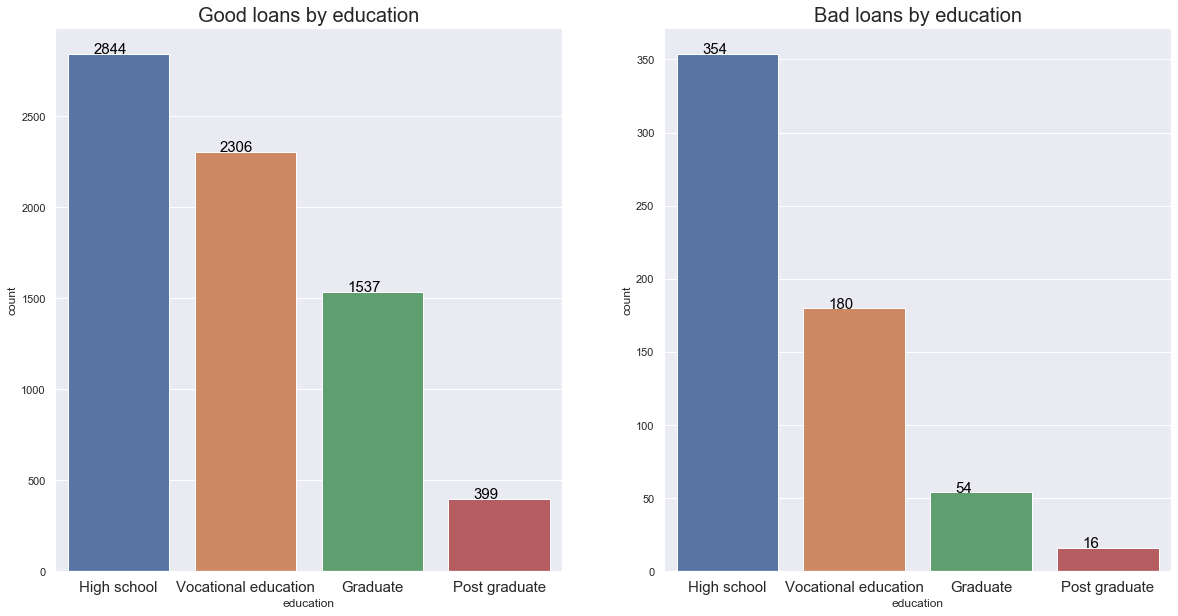

In [573]:
count_plot('education',)

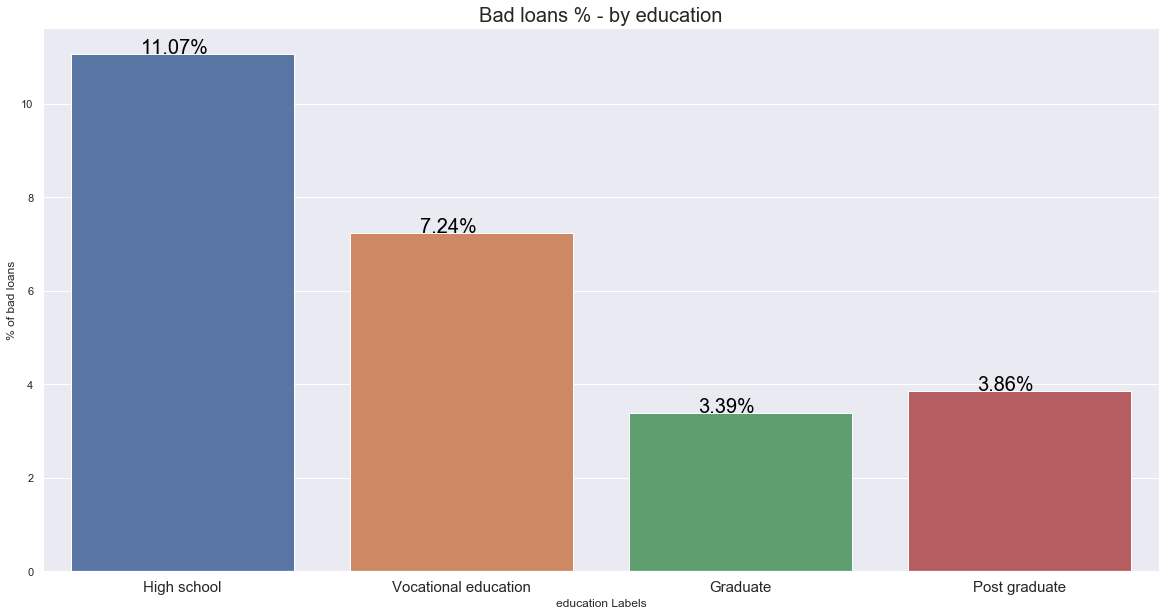

In [574]:
bad_loans_percent('education')

## Risky:
* High School - 11.07%
* Vocational Edu - 7.24%

## Good choice:
* Graduates - 3.39% 
* st Graduates - 3.86%

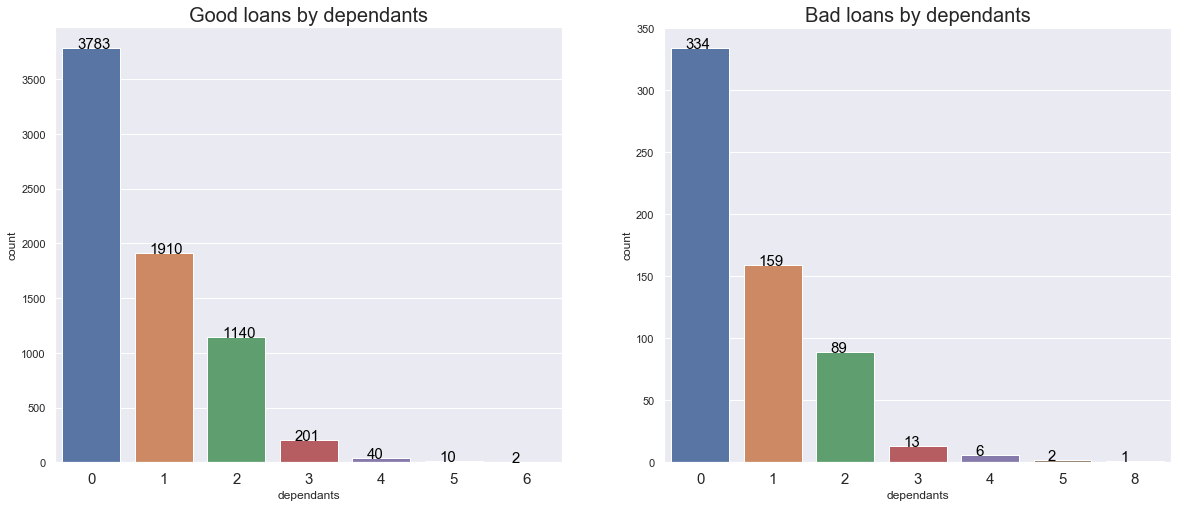

In [575]:
count_plot_unordered('dependants')

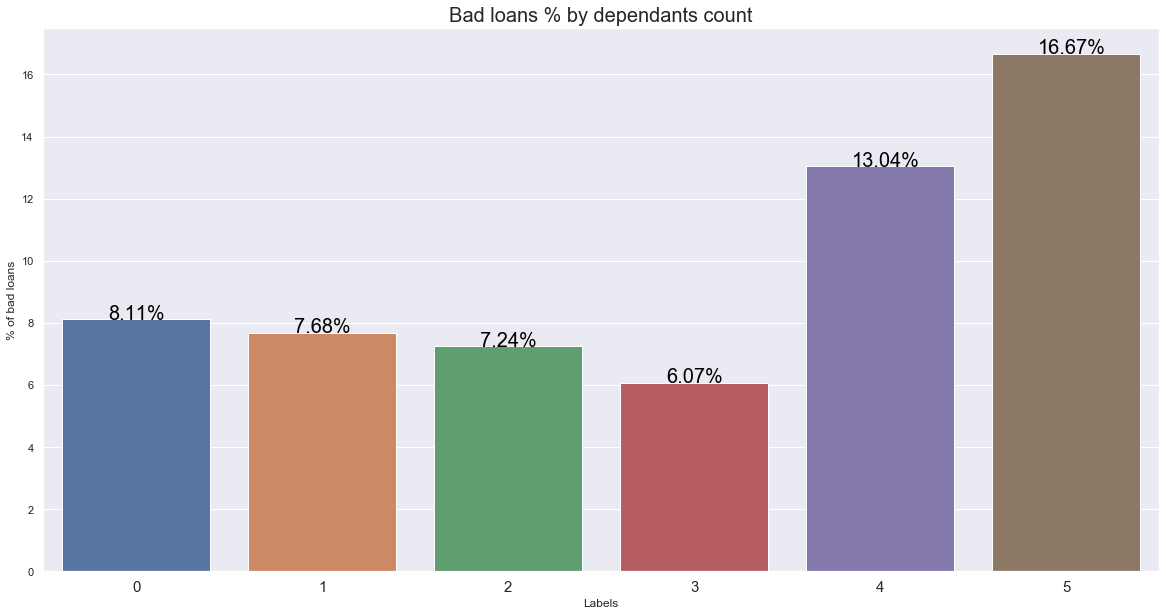

In [628]:
hypothesis_graph('dependants', df[df['dependants']<6], 'Bad loans % by dependants count')

### Risky:
* 5 children = 16.67% default (Only 12 values)
* 4 children = 13.04% default (Only 46 values)

### Better options:
* 0 children = 8.11% default
* 1 children = 7.68% default
* 3 children = 6.07% default


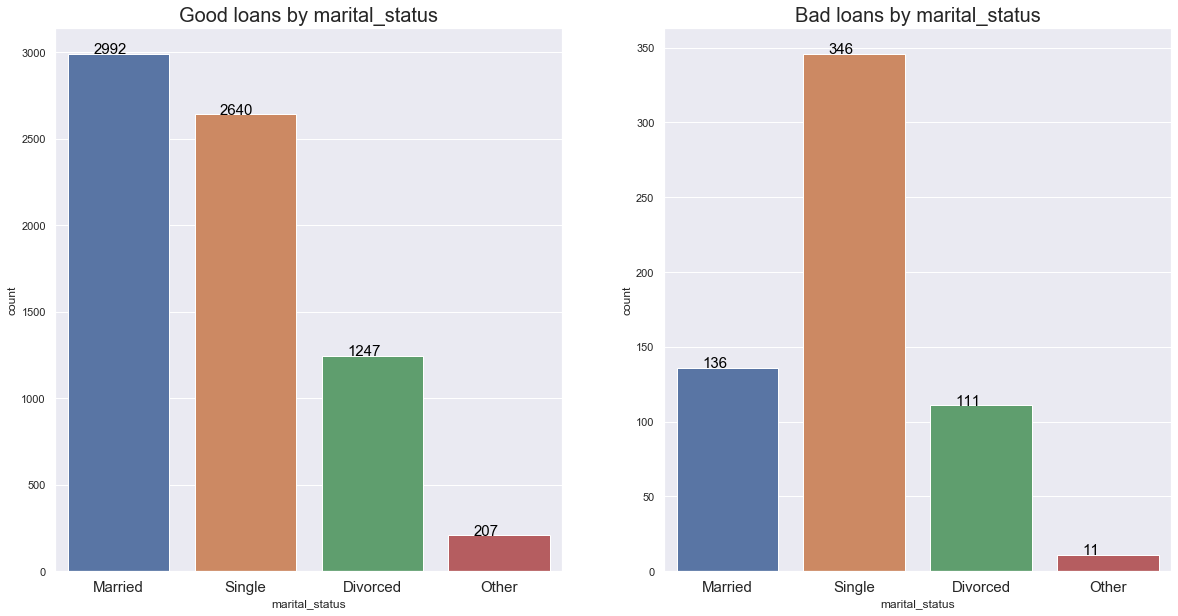

In [578]:
count_plot('marital_status')

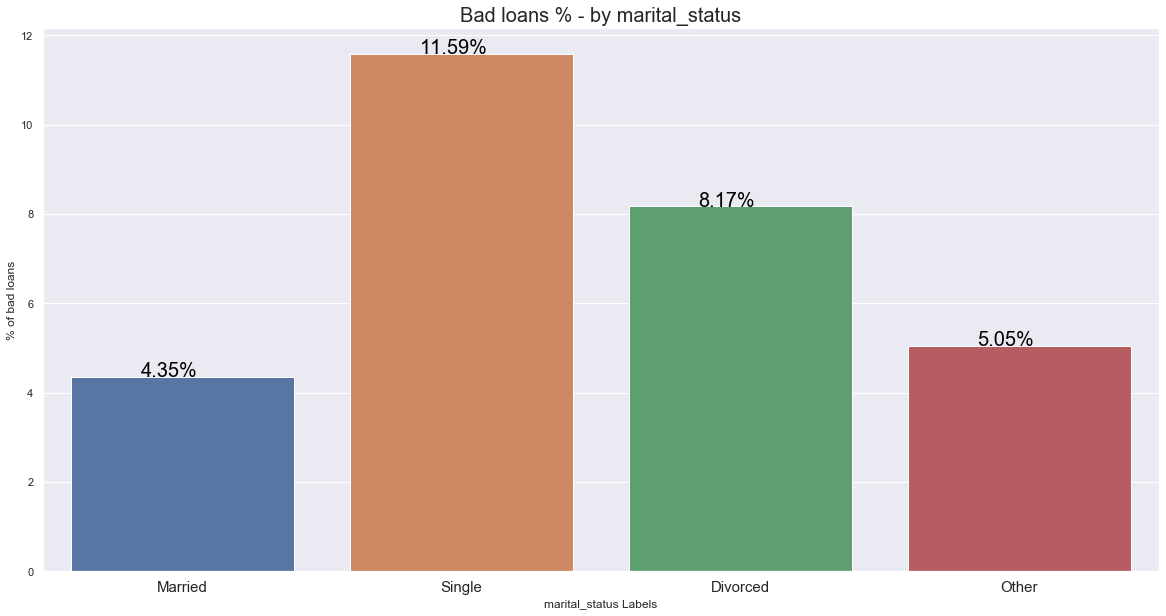

In [579]:
bad_loans_percent('marital_status')

### Risky:
* Single - 11.59%
* Divorced - 8.17%

### Good choice:
* Married - 4.35%

# Feature enginering

Extract from dates:
- Year +
- quarter +
- Month +
- Day of the week +
- Season (Summer, Winter, Autum, Spring) + 
- is holiday (Lithuanian holidays) +
- Week of year + 
- day of month +
- Day of year +
- weather?
- move cities to regions of lithuania, like (Aukstaitija etc...)
- Add age groups +
- categorical combinations = ['credit_score', 'gender', 'education', 'marital_status']

In [580]:
#Function to label data by season
def season(s):
    if s.month in [12,1,2]:
        return 'winter' 
    elif s.month in [3,4,5]:
        return 'spring' 
    elif s.month in [6,7,8]:
        return 'summer' 
    elif s.month in [9,10,11]:
        return 'autumn'

In [581]:
#Function to label data by season number    
def season_number(s):
    if s.season == 'winter':
        return 4 
    elif s.season == 'spring':
        return 1
    elif s.season == 'summer':
        return 2
    elif s.season == 'autumn':
        return 3

In [582]:
#Checks if day was a holiday
lithuanian_holidays = [] 
for date in holidays.Lithuania(years=[2015,2016,2018,2019]).items():
    lithuanian_holidays.append(date[0])
def inlithuanian_holidays(s):
    if s.creation_date in lithuanian_holidays:
        return 1
    else:
        return 0

In [583]:
#Function to sort people to age groups
def age_grouping(s):
    if s.age < 20:
        return "to 19"
    elif s.age >= 20 and s.age < 23:
        return "19 to 23"
    elif s.age >= 23 and s.age < 30:
        return "23 to 30"
    elif s.age >= 30 and s.age < 40:
        return "30 to 40"
    elif s.age >= 40 and s.age < 50:
        return "40 to 50"
    elif s.age >= 50 and s.age < 60:
        return "40 to 50"
    elif s.age >= 60:
        return "60+"

In [584]:
df['year'] = df.creation_date.dt.year
df['month'] = df.creation_date.dt.month
df['quarter'] = df.creation_date.dt.quarter
df['dayofweek'] = df.creation_date.dt.dayofweek + 1
df['dayofweek_name'] = df.creation_date.dt.weekday_name
df['is_weekend'] = np.where(df['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
df['dayofmonth'] = df.creation_date.dt.day
df['dayofyear'] = df.creation_date.dt.dayofyear
df['week_number'] = df.creation_date.dt.week    
df['season'] =  df.apply(season, axis=1)
df['season_number'] =  df.apply(season_number, axis=1)
df['is_holiday'] = df.apply(inlithuanian_holidays, axis=1)
df['age_group'] = df.apply(age_grouping, axis=1)

In [585]:
#Feature enginering categorical combinations
import itertools

cat_features = ['credit_score', 'gender', 'education', 'marital_status']

for col1, col2 in itertools.combinations(cat_features, 2):
        new_col_name = '_'.join([col1, col2])

        # Convert to strings and combine
        new_values = df[col1].map(str) + "_" + df[col2].map(str)
        
        df[new_col_name] = new_values     

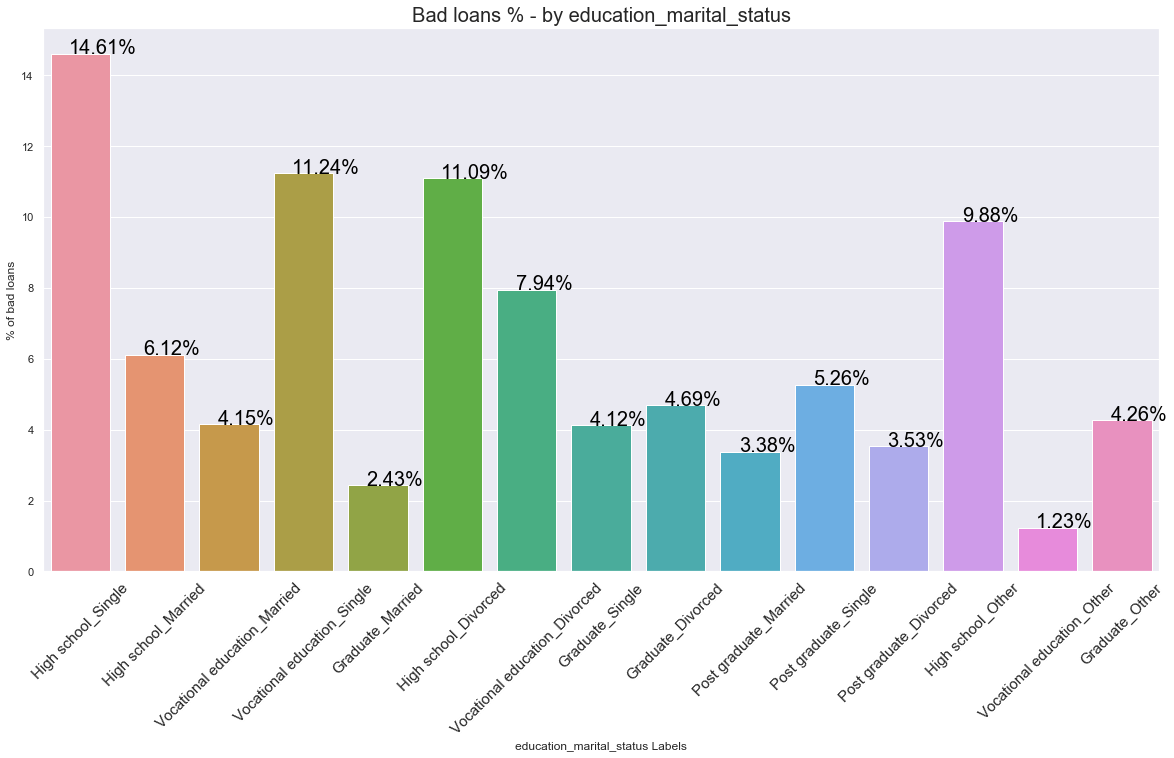

In [588]:
bad_loans_percent('education_marital_status', 45)

## Continue EDA with Feature engineered Data

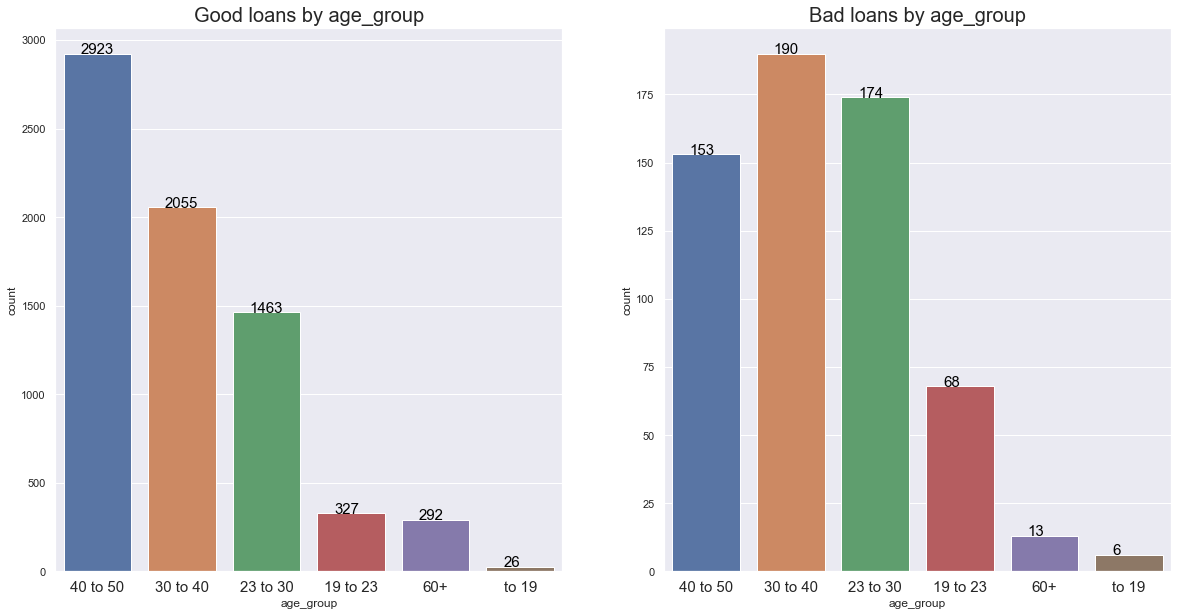

In [589]:
count_plot('age_group')

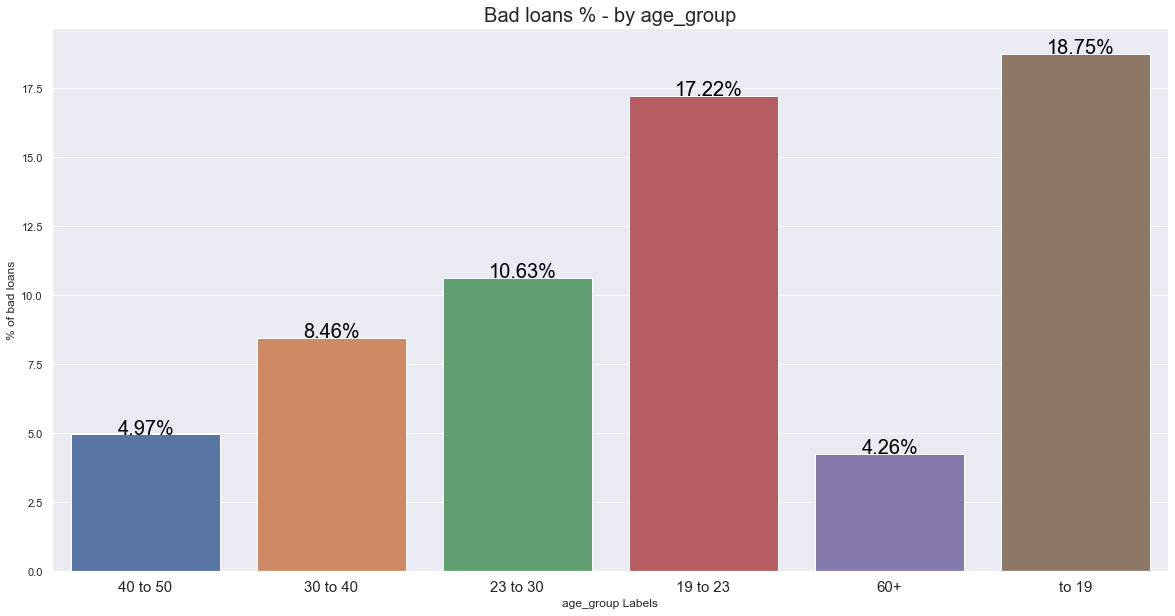

In [590]:
bad_loans_percent('age_group')

### Avoid:
* 0 - 19 years old - 18.75%
* 19 - 23 years old - 17.22% 
* 23 - 30 years old - 10.63%
* 30 - 40 years old - 8.46%

### Good options:
* 40 - 50 years old - 4.97%
* 60+ years old - 4.26% 

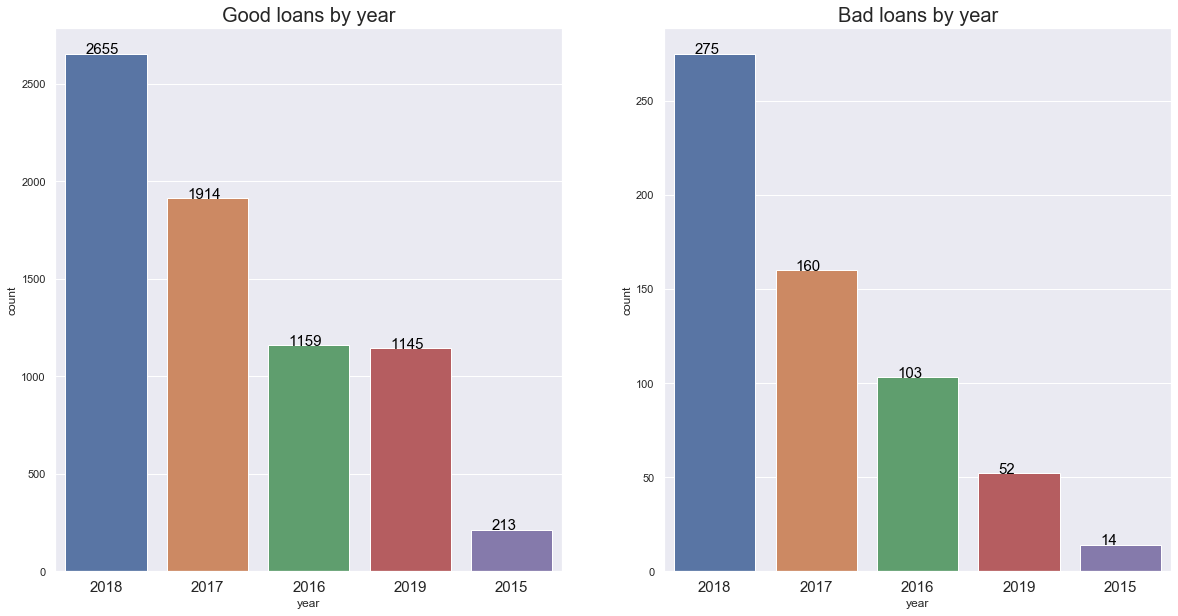

In [591]:
count_plot('year')

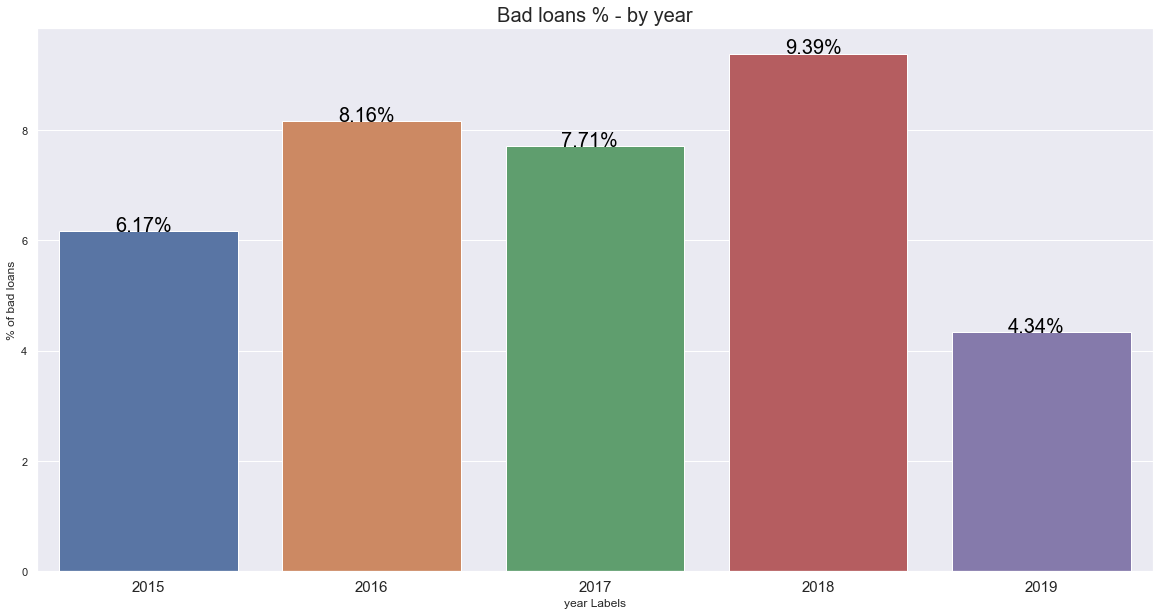

In [592]:
bad_loans_percent('year')

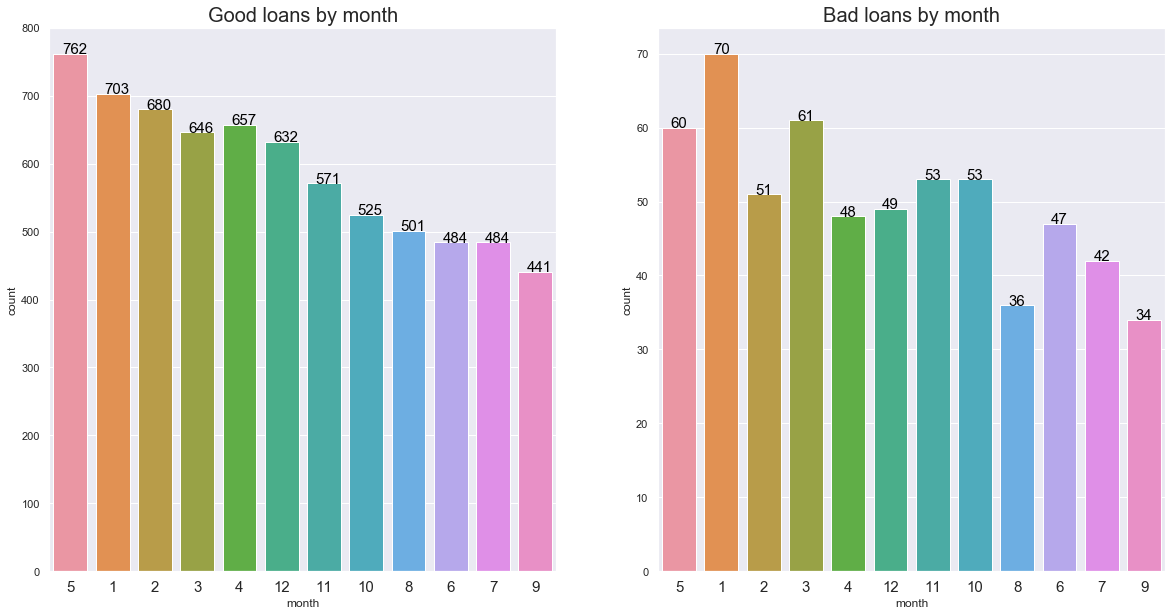

In [593]:
count_plot('month')

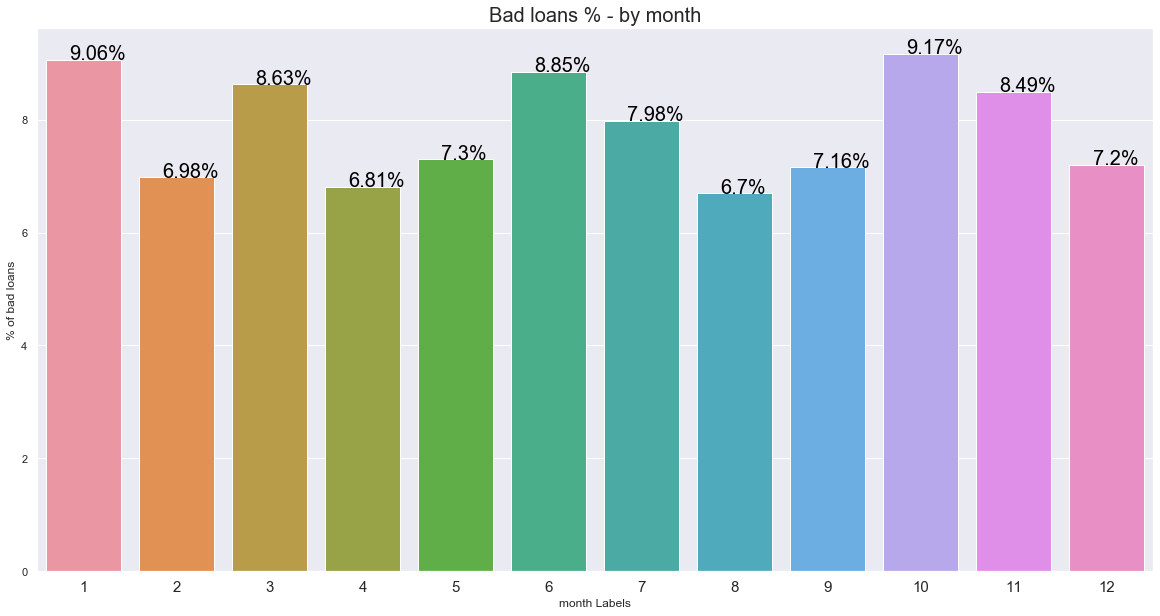

In [594]:
bad_loans_percent('month')

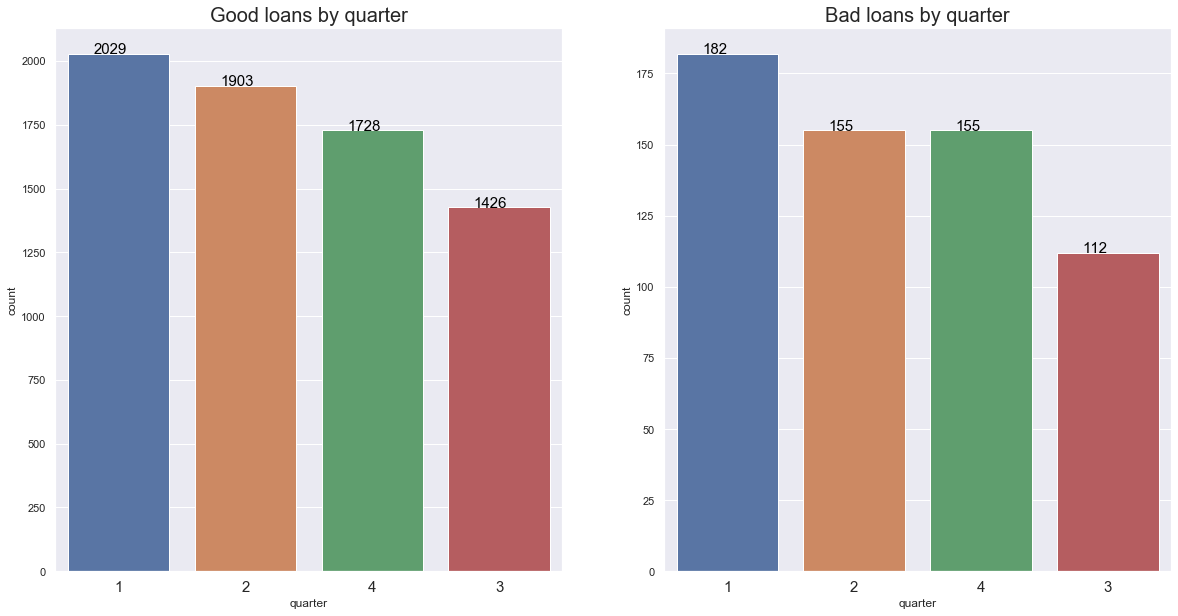

In [595]:
count_plot('quarter')

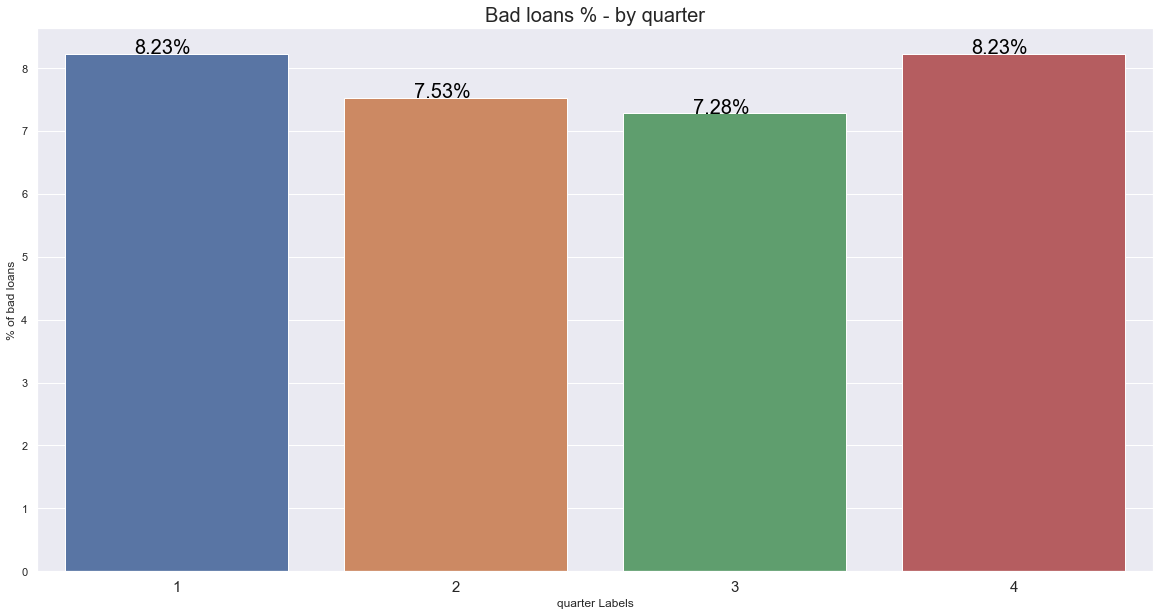

In [596]:
bad_loans_percent('quarter')

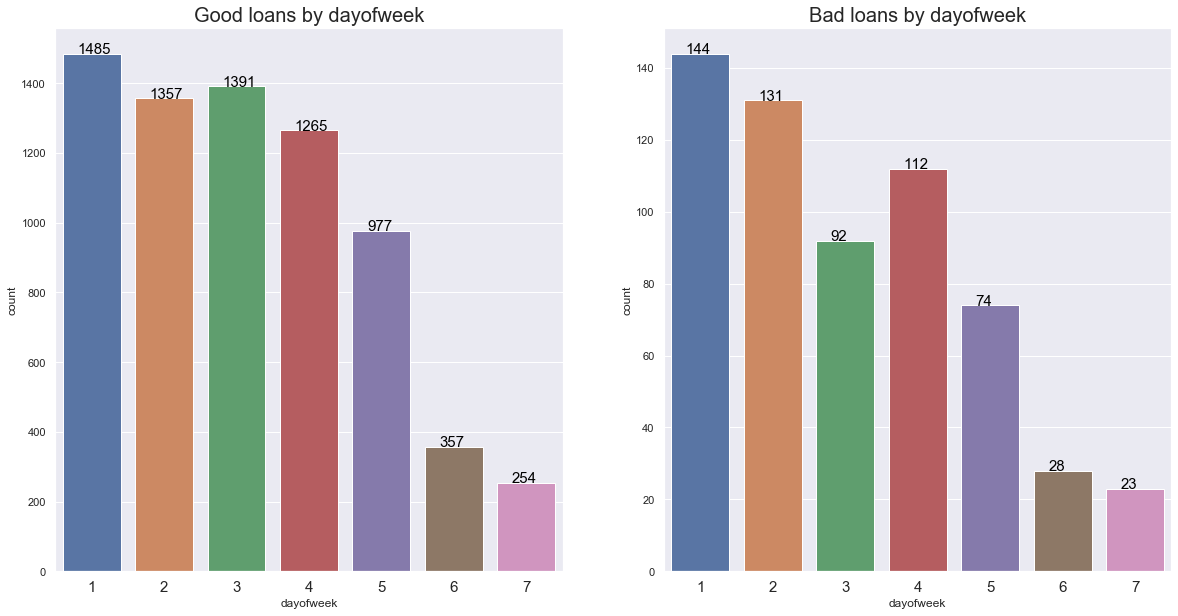

In [597]:
count_plot('dayofweek')

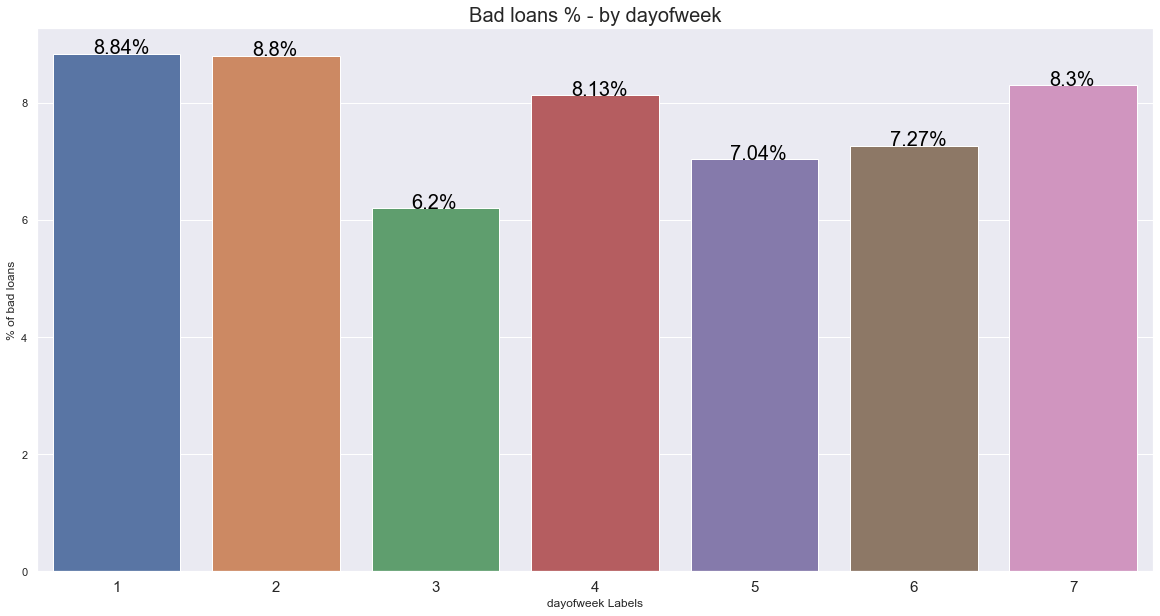

In [598]:
bad_loans_percent('dayofweek')

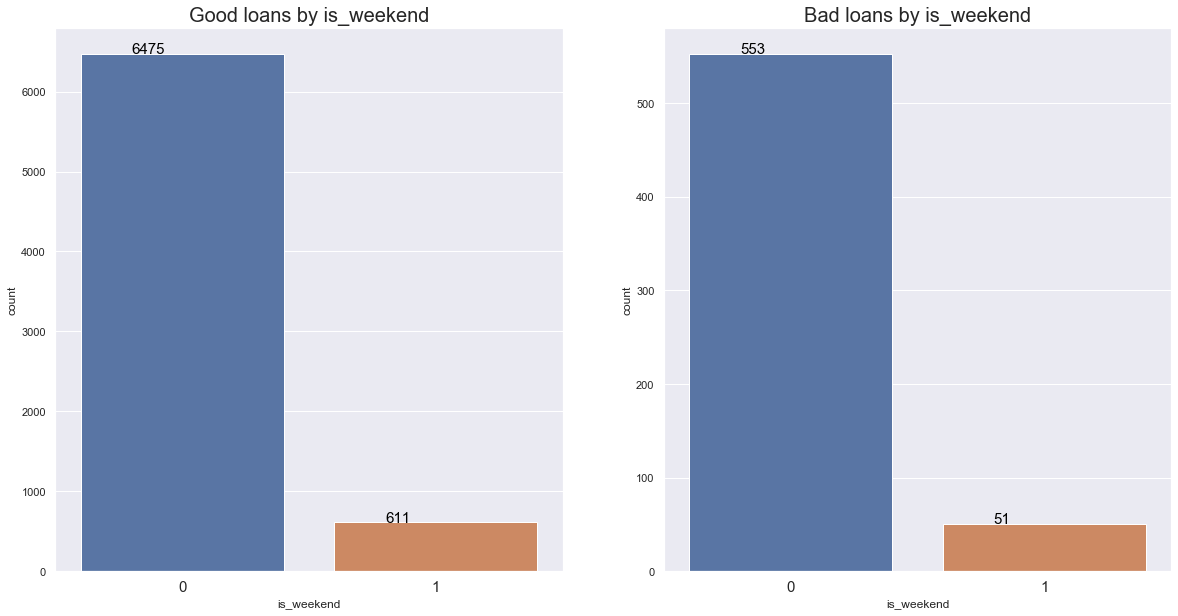

In [599]:
count_plot('is_weekend')

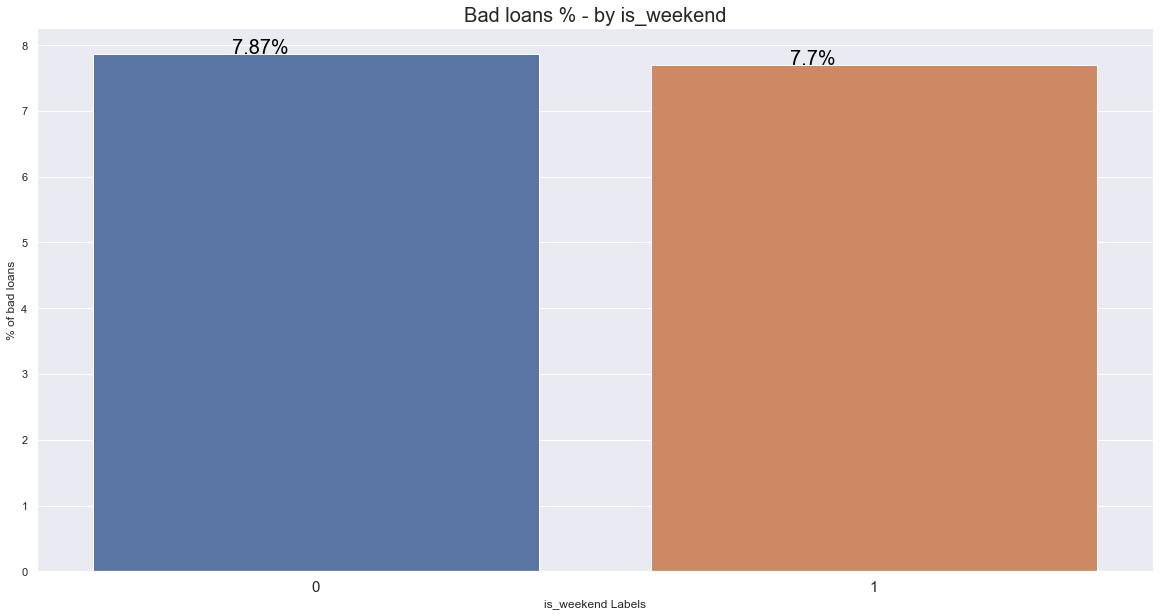

In [600]:
bad_loans_percent('is_weekend')

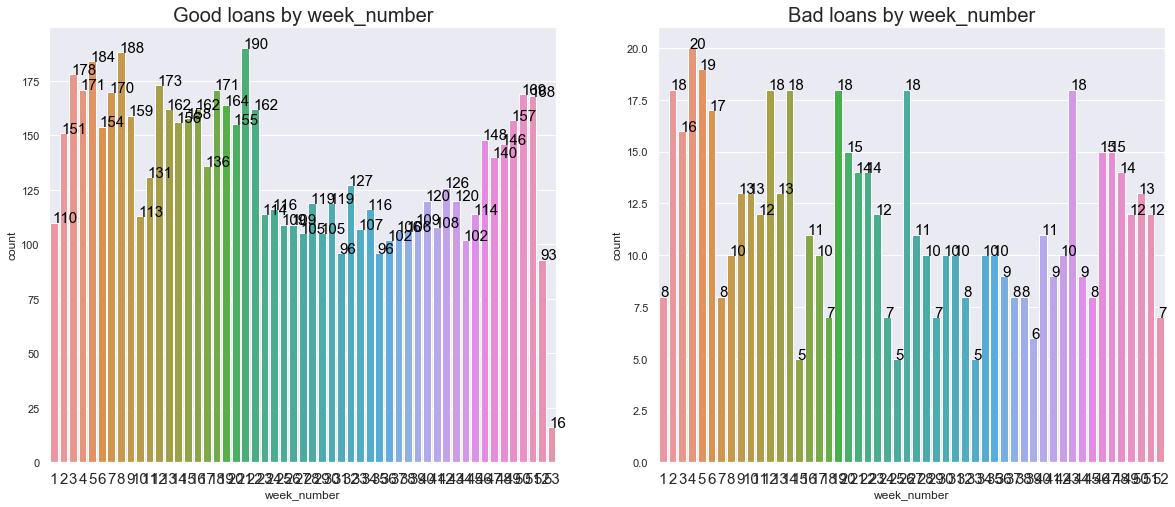

In [601]:
count_plot_unordered('week_number')

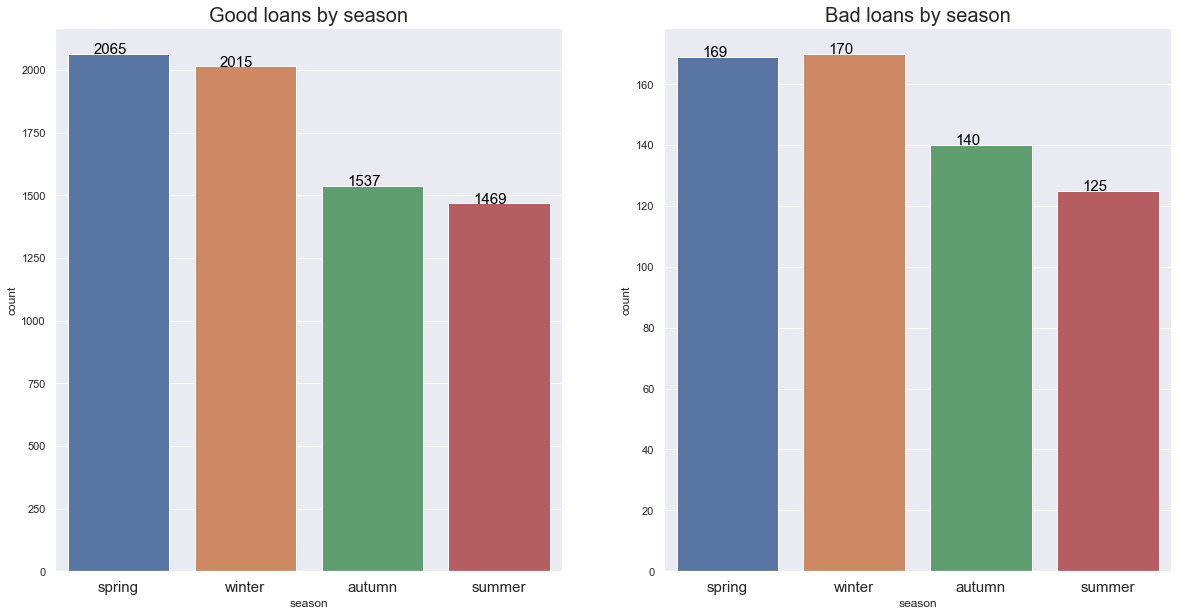

In [602]:
count_plot('season')

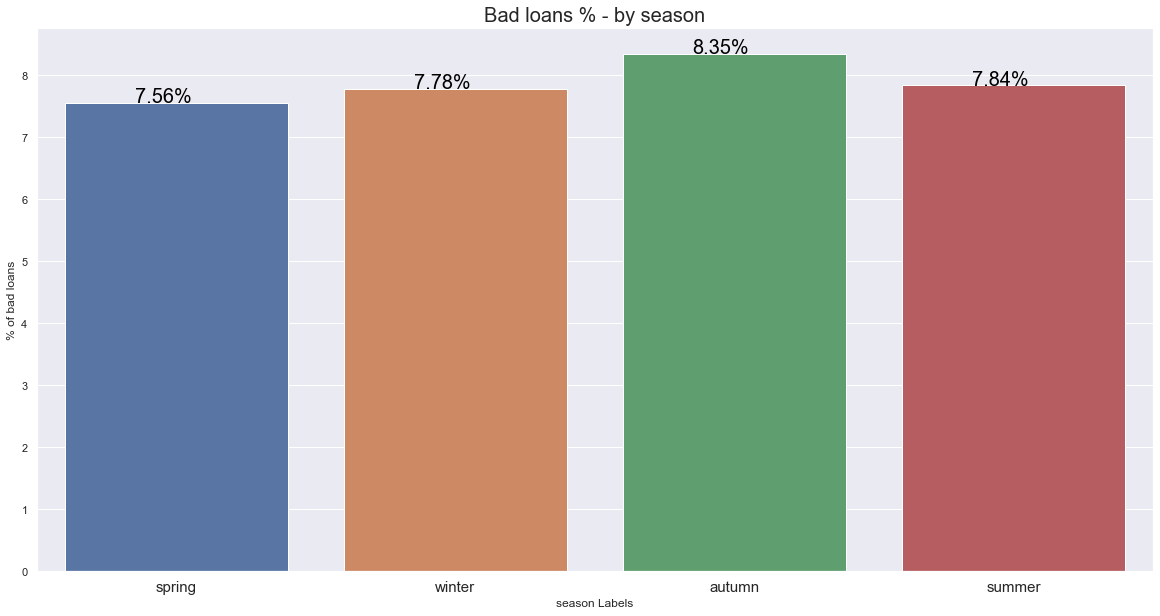

In [603]:
bad_loans_percent('season')

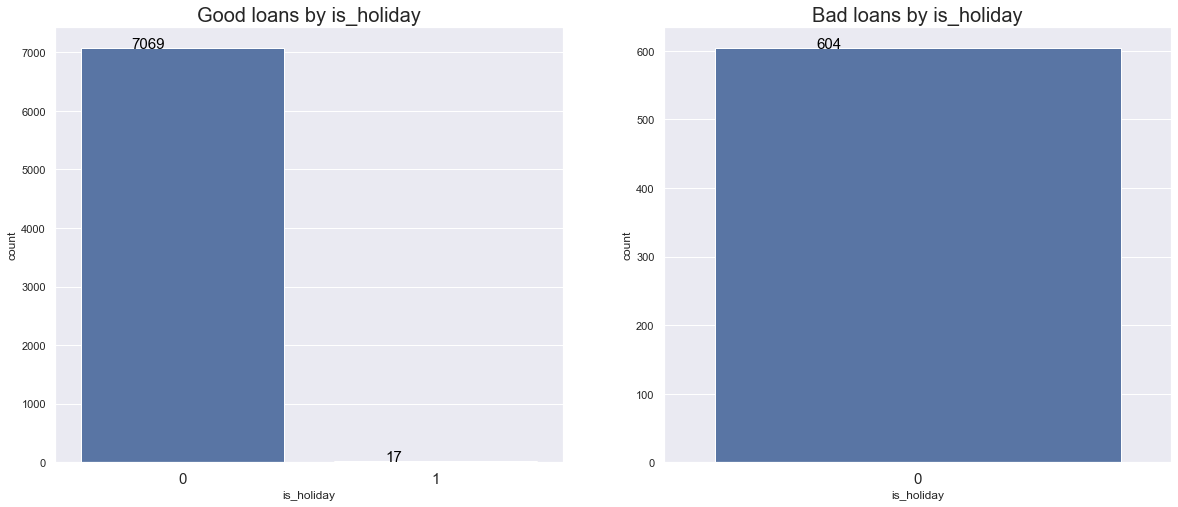

In [604]:
count_plot_unordered('is_holiday')

In [605]:
#occupation - seems to have too mane unique values - not need
len(df['occupation'].unique())

1743

In [606]:
#employ_how_long - Remove words
df.employ_how_long.unique()
df['employ_how_long'] = df['employ_how_long'].astype(str).apply(lambda x: x.strip('or more'))
df.employ_how_long = df.employ_how_long.astype(int)
df.employ_how_long.unique()

array([ 9, 72, 60, 15, 36,  3, 12, 18,  6, 24, 48], dtype=int64)

Text(0.5, 1.0, 'Employed months at current work')

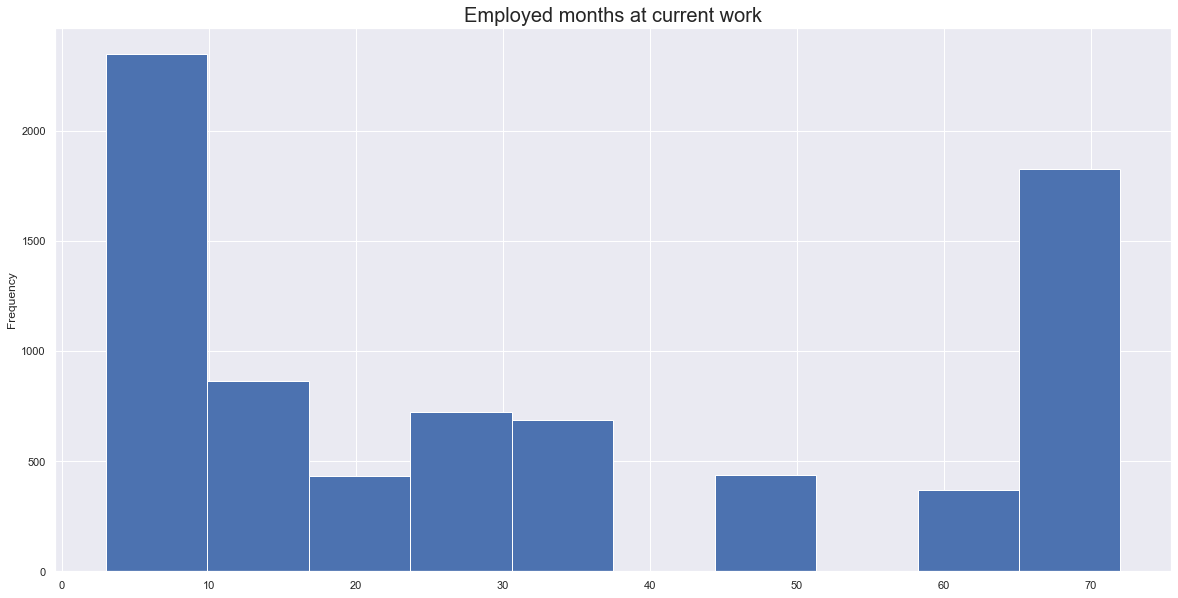

In [607]:
plt.figure(figsize=(20,10))
df['employ_how_long'].plot.hist()
plt.title('Employed months at current work', fontsize=20)

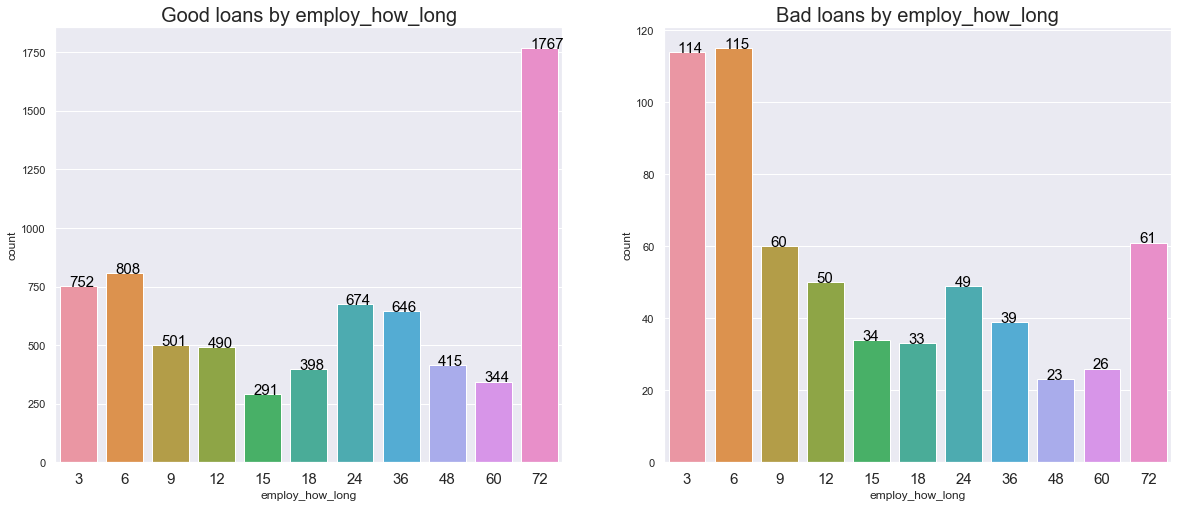

In [608]:
count_plot_unordered('employ_how_long')

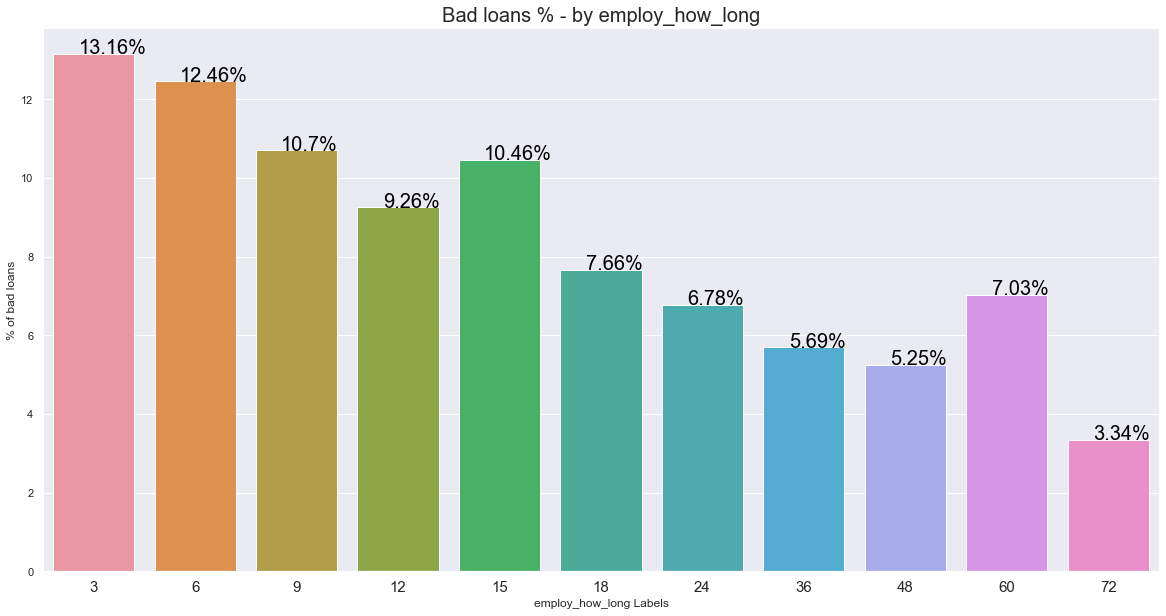

In [609]:
bad_loans_percent('employ_how_long')

* It seems, the longer person is employed, the lower is his risk to default
* The shorter is employment status, the higher risk of defaulting

In [610]:
df.years_working_in_total.unique()

array(['3', '33', '18', '30', '20', '4', '37', '8', '34', '15', '25',
       '32', '12', '19', '16', '10', '22', '5', '36', '6', '1', '29', '2',
       '7', '1.5', '17', '42', '13', '9', '11', '26', '23', '40', '24',
       '14', '31', '35', '21', '39', '28', '27', '44', '3,5', '3.5', '45',
       '41', '0.4', '1.8701', '38', '0.5', '0', '20m', '43', '16 metu',
       '0.3', '5.5', '2.5', '0,4', '0.6', '1.3', '1.6', '1 metai', '2, 4',
       '2m', '5 metai', '0.7', '0.8', '7.5', '47', '1.2', '0,6', '1,5',
       '0,3', '2,5', '1.8', '4.5', '0.9', '8 men', '1.6m', '46',
       '5 mėnesiai', '0,8', '4men', 'virs 10', '2016 08 04', '1metai',
       '10 metų', '20 metu', '9m', '1m', '20 metų', '1.5 m', '4 metai',
       '3 metai', '25+', 'apie 10 m.', '6 metai', '17m.', '2metai'],
      dtype=object)

In [611]:
df.years_working_in_total = df.years_working_in_total.str.replace('[^0-9]', '')
df.years_working_in_total = df.years_working_in_total.astype('int8')

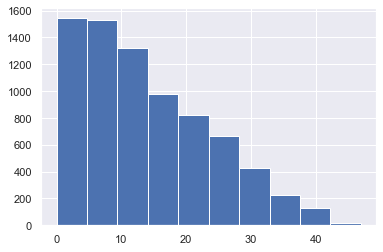

In [612]:
#some workers are working more years than they are aged. Seems this column may be corrupted
df[df.years_working_in_total < df.age].years_working_in_total.hist()

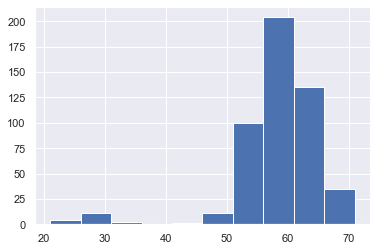

In [613]:
#Dont use - years_working_in_total - may be corrupted
df[df.years_working_in_total > 30].age.hist()

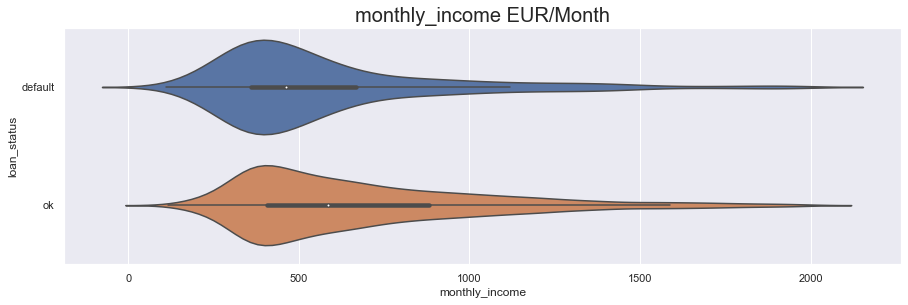

In [614]:
violin_plot('monthly_income','loan_status',df[df['monthly_income']<2000],'monthly_income EUR/Month')

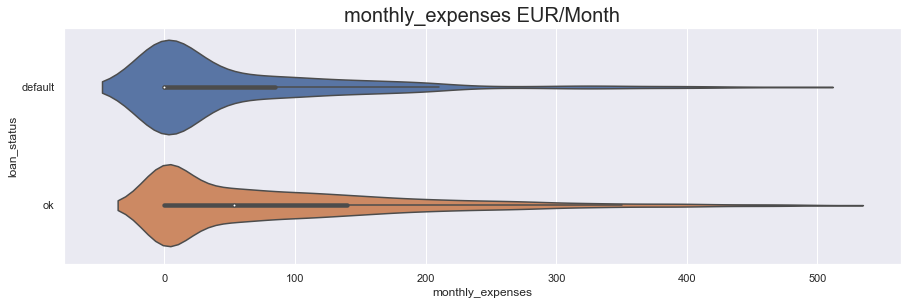

In [615]:
violin_plot('monthly_expenses','loan_status',df[df['monthly_expenses']<500],'monthly_expenses EUR/Month')

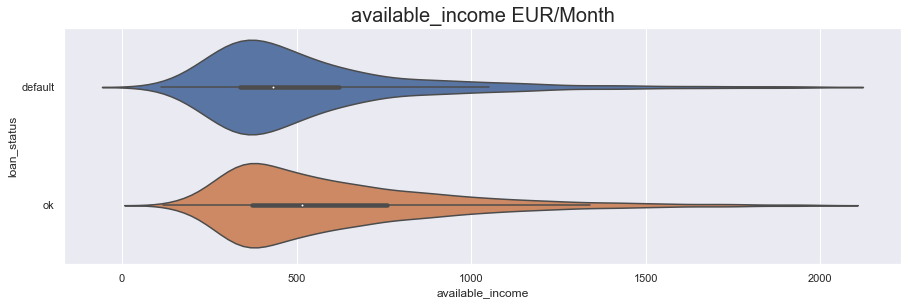

In [616]:
violin_plot('available_income','loan_status',df[df['available_income']<2000],'available_income EUR/Month')

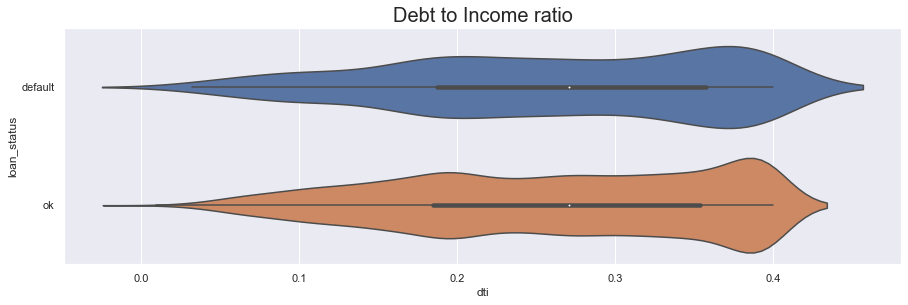

In [617]:
violin_plot('dti','loan_status',df,'Debt to Income ratio')

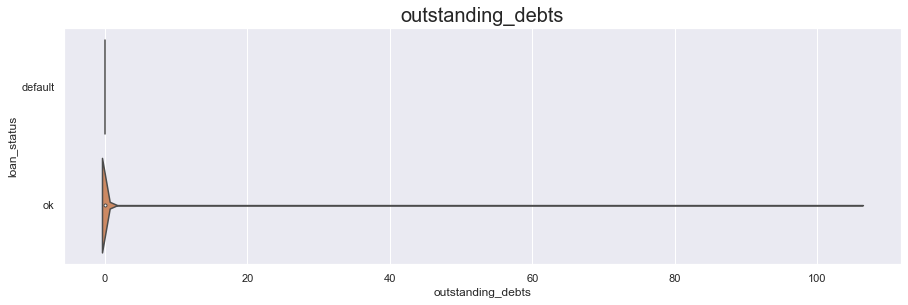

In [618]:
violin_plot('outstanding_debts','loan_status',df,'outstanding_debts')
#Drop outstanding debs - seems that no loan takes had any debts

In [619]:
df['credit_score'].unique()

array(['D', 'A', 'C', 'B', 'A*'], dtype=object)

## Hypothezis testing

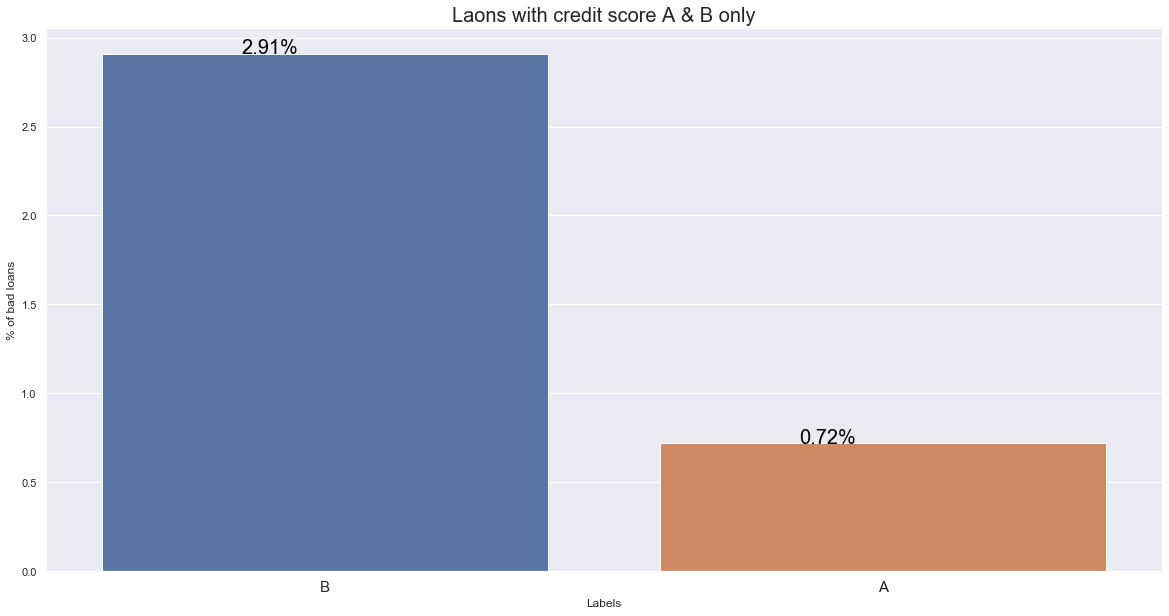

In [620]:
hypothesis_graph('credit_score', df[(df.credit_score == 'A') |(df.credit_score == 'B')], "Laons with credit score A & B only")

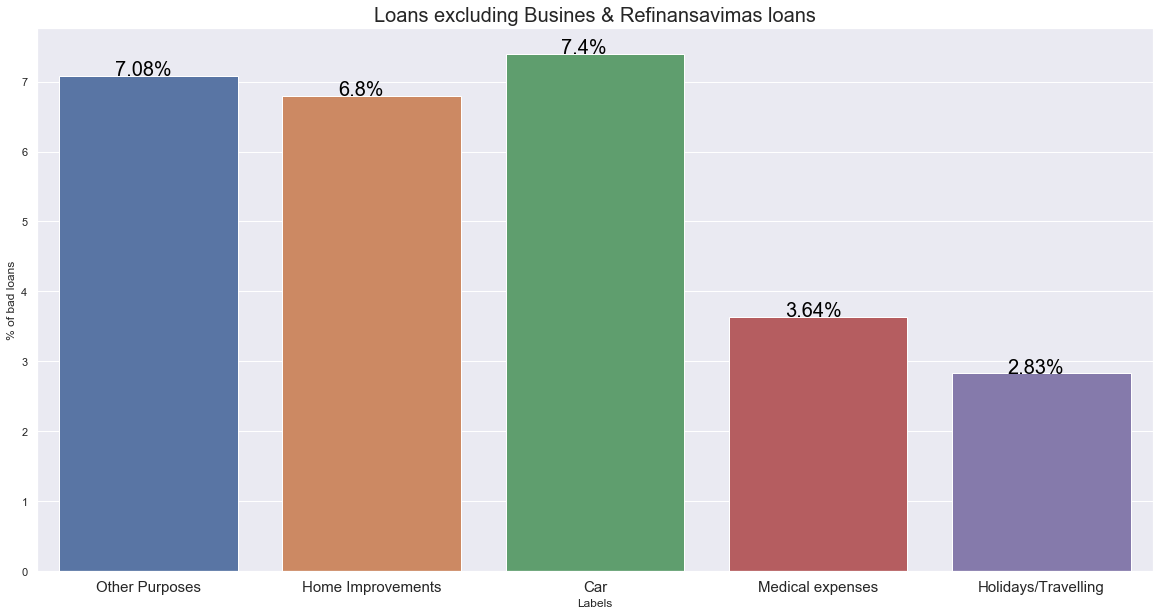

In [621]:
columns_return = ['Car', 'Other Purposes','Holidays/Travelling', 'Medical expenses', 'Home Improvements',]
data=df.loc[df['listing_category'].isin(columns_return)]
hypothesis_graph('listing_category', data, "Loans excluding Busines & Refinansavimas loans")

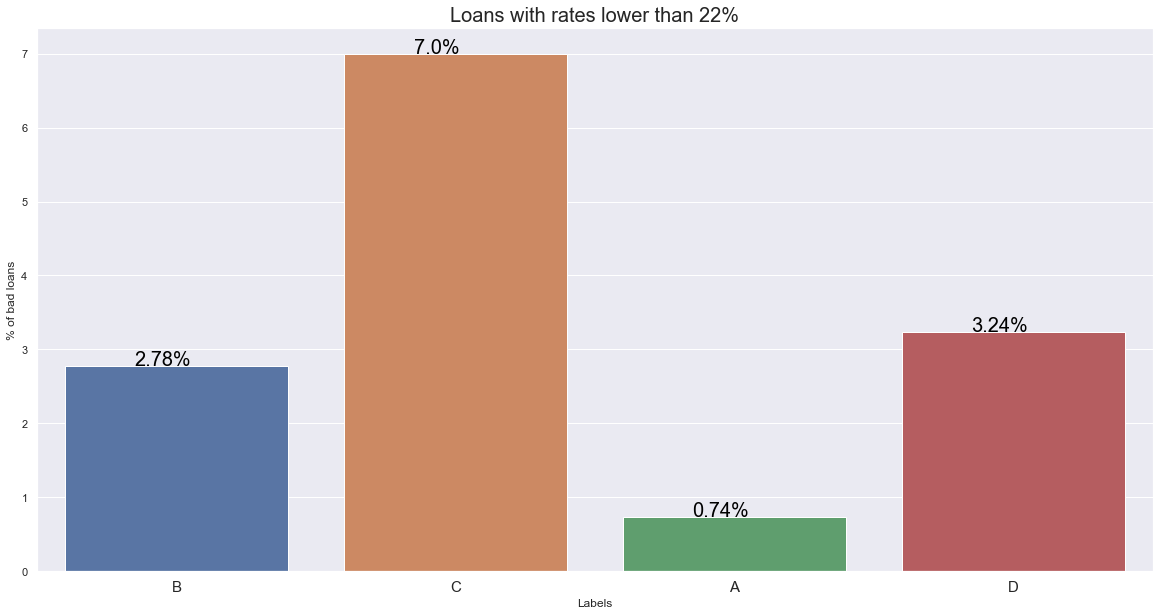

In [622]:
hypothesis_graph('credit_score', df[df.effective_rate < 0.22], "Loans with rates lower than 22%")

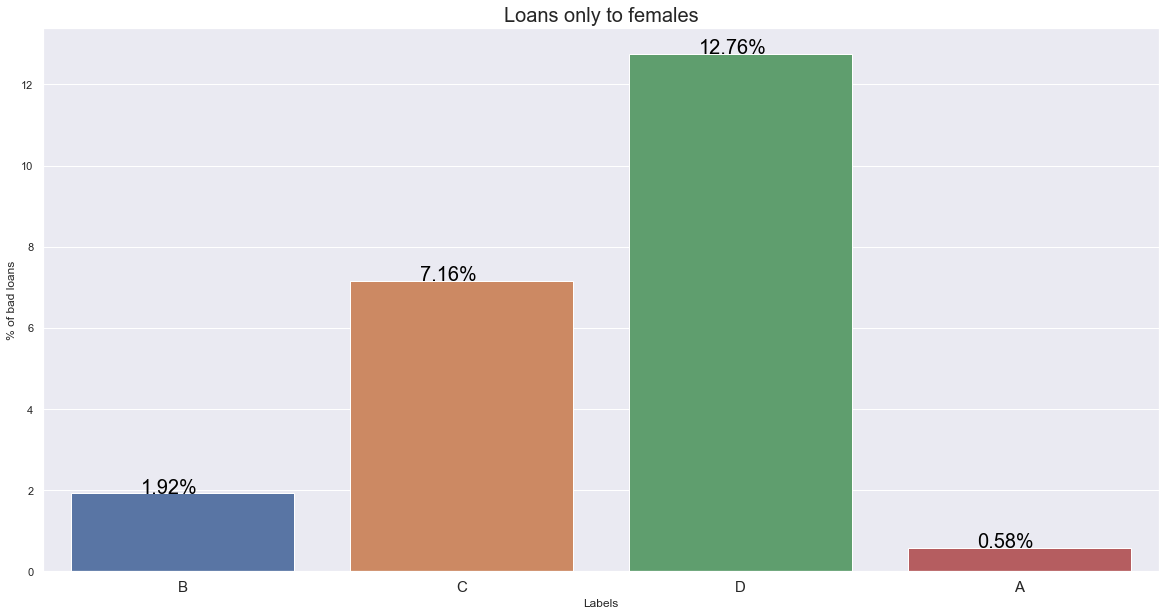

In [623]:
hypothesis_graph('credit_score', df[df.gender == 'Female'], "Loans only to females")

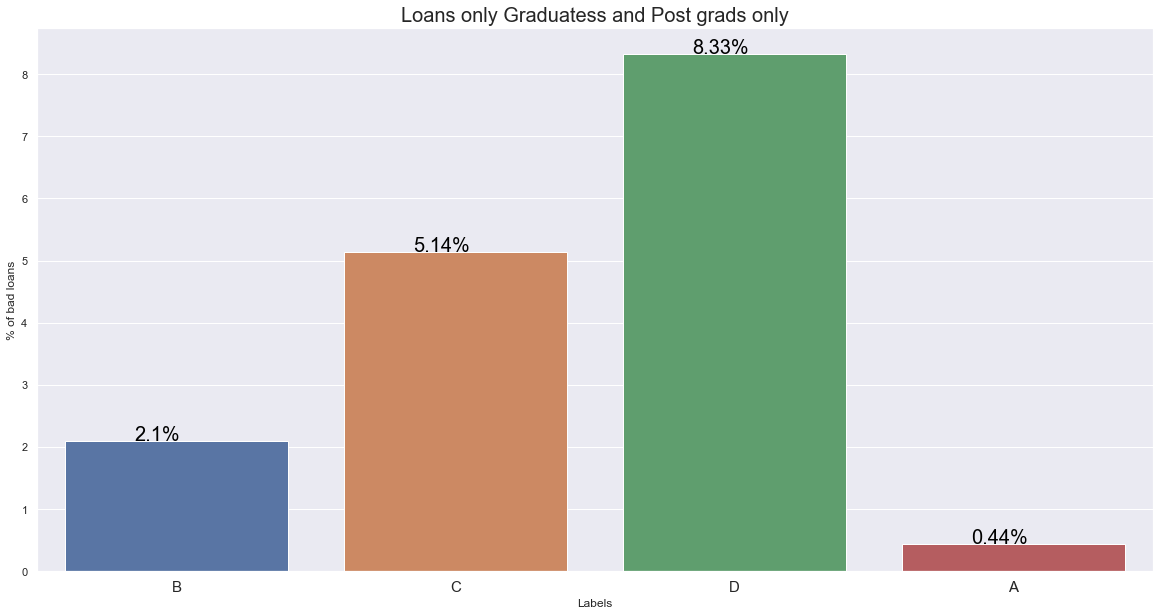

In [624]:
hypothesis_graph('credit_score', df[(df.education == 'Graduate') | (df.education == 'Post graduate')], "Loans only Graduatess and Post grads only")

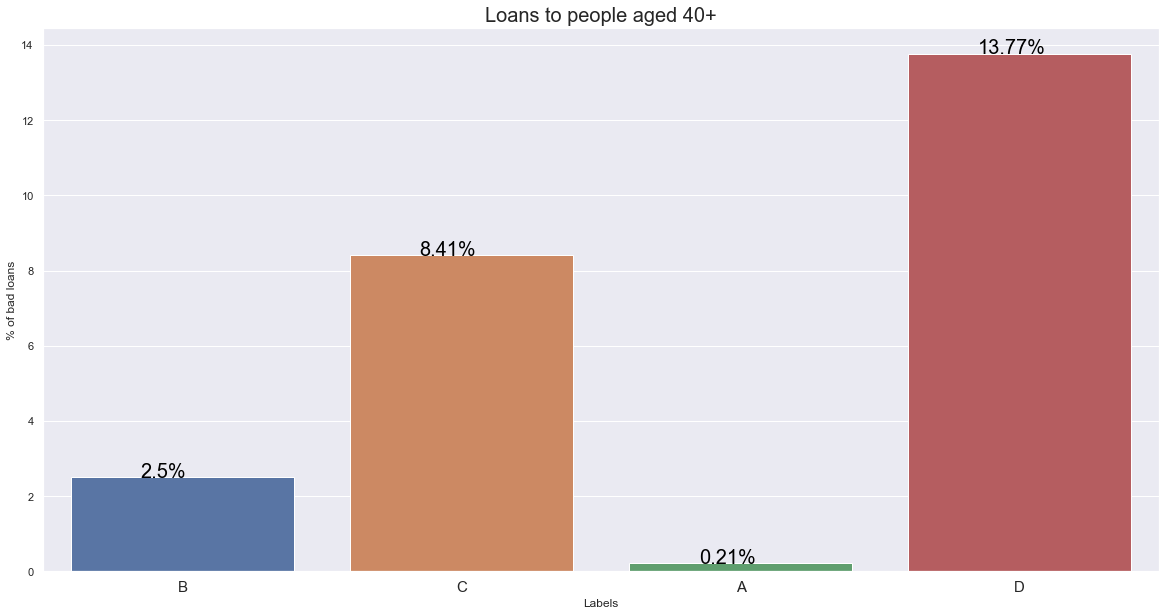

In [625]:
hypothesis_graph('credit_score', df[(df.age >= 40) &(df.age < 63)  ], "Loans to people aged 40+")

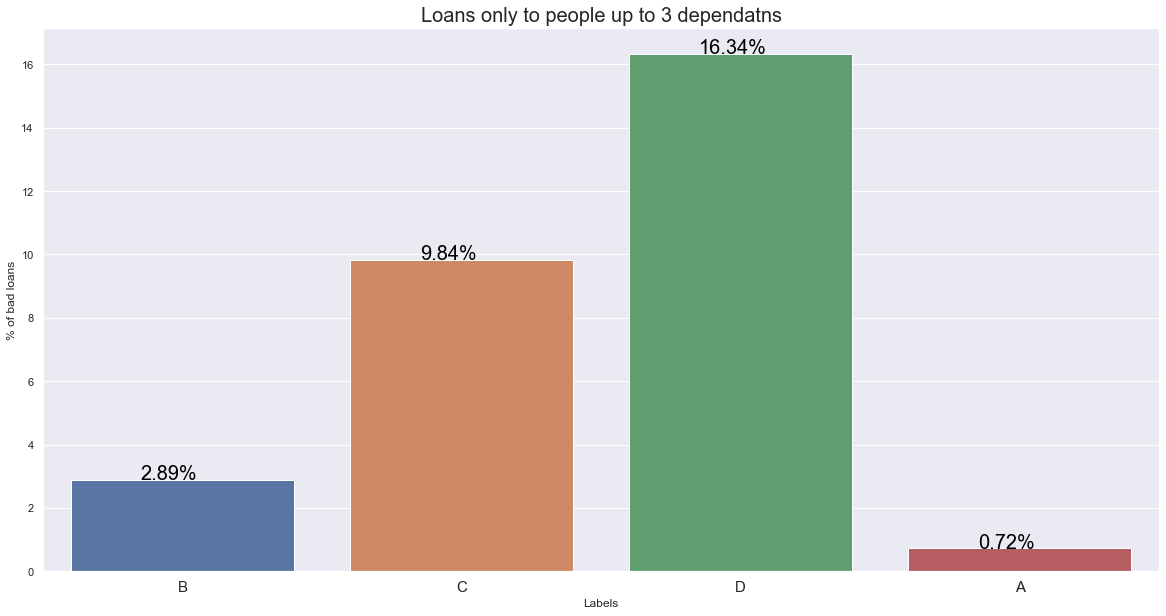

In [626]:
hypothesis_graph('credit_score',df[df.dependants <= 3],"Loans only to people up to 3 dependatns")

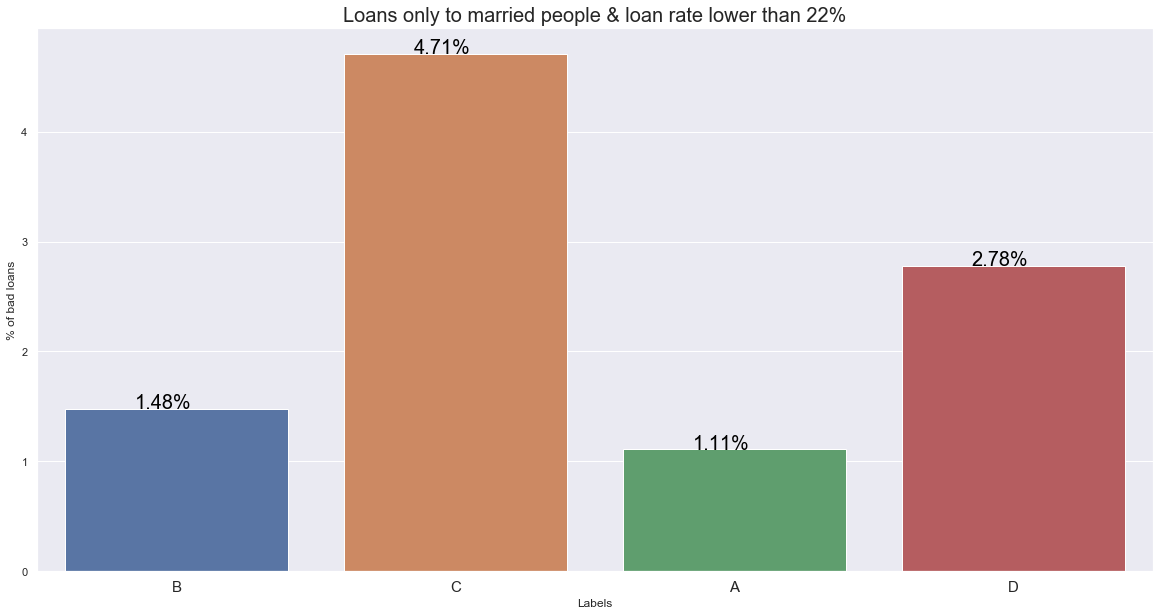

In [627]:
data = df[((df.marital_status=='Married') | (df.marital_status=='Other')) & ((df.effective_rate <= 0.22)) ]
title = "Loans only to married people & loan rate lower than 22%"
hypothesis_graph('credit_score',data,title)

### Features selection
Based on dataset we see that only following feature may be of value for models

### To use:
1. listing_category
2. loan_amount
3. loan_period
4. effective_rate
5. monthly_installment
6. gender
8. age
9. education
10. employment_status
12. employ_how_long
14. dependants
15. marital_status
16. monthly_income
18. available_income
19. dti
21. year of loan
22. month of loan
23. quarter of loan
24. dayofweek - monday to sunday
25. is_weekend - if loan was created on weekened
26. dayofmonth - day number in a month
27. week_number - number of week in a year
28. season - season when loan was taken
29. is_holiday - if loan was taken on holiday
30. dayofyear
31. age_group
### Not to use:
7. post_town - **Don't use** too many values
11. occupation **Dont use** - too many unique
13. years_working_in_total **Don't use** - corrupted, wrong collection
17. monthly_expenses **Don't use** - more than 50% of borrowers declare less than 100EUr/month expenses
20. outstanding_debts **Don't use** - no data is collected, most are 0

In [20]:
#Dropping unneeded columnts to free some memory

original_df = df.copy()

df = df.drop(columns=['listing_id','loan_paid_date','first_installement_date','loan_paid_status','confirm_status',
                'post_town', 'occupation','username','listing_title','job_loss_insurance', 'preferred_rate', 
                 'amount_outstanding', 'principal_repaid', 'interest_paid', 'arrears', 'type', 'credit_check_date',
                 'years_working_in_total', 'monthly_expenses','outstanding_debts', 'last_debt_date' ])

In [21]:
df.head()

,creation_date,listing_category,credit_score,loan_amount,loan_period,effective_rate,monthly_installment,loan_status,gender,age,education,employment_status,employ_how_long,dependants,marital_status,monthly_income,available_income,dti,year,month,quarter,dayofweek,dayofweek_name,is_weekend,dayofmonth,dayofyear,week_number,season,season_number,is_holiday,age_group,credit_score_gender,credit_score_education,credit_score_marital_status,gender_education,gender_marital_status,education_marital_status
804,2019-06-01,Car,D,1655,45,0.27,68.10,default,Male,22,Vocational education,Employed,9,0,Single,393,314,0.3743,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,19 to 23,D_Male,D_Vocational education,D_Single,Male_Vocational education,Male_Single,Vocational education_Single
805,2019-06-01,Consolidation of Other Loans,A,1800,15,0.12,134.69,ok,Male,53,Vocational education,Employed,72 or more,0,Married,906,906,0.1487,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50,A_Male,A_Vocational education,A_Married,Male_Vocational education,Male_Married,Vocational education_Married
806,2019-06-01,Other Purposes,C,500,24,0.20,27.39,ok,Female,42,Vocational education,Employed,72 or more,0,Married,601,395,0.3883,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50,C_Female,C_Vocational education,C_Married,Female_Vocational education,Female_Married,Vocational education_Married
807,2019-06-01,Consolidation of Other Loans,D,1035,36,0.26,47.17,ok,Female,22,Vocational education,Employed,9,0,Single,487,422,0.2303,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,19 to 23,D_Female,D_Vocational education,D_Single,Female_Vocational education,Female_Single,Vocational education_Single
809,2019-06-01,Other Purposes,D,885,30,0.26,44.96,ok,Female,56,Vocational education,Employed,60,1,Married,853,762,0.1594,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50,D_Female,D_Vocational education,D_Married,Female_Vocational education,Female_Married,Vocational education_Married


In [22]:
baseline_features = ['listing_category','credit_score','loan_amount','loan_period','effective_rate','monthly_installment',
            'gender','age','education','employment_status','employ_how_long','dependants',
            'marital_status','monthly_income','available_income','dti','year','month','dayofmonth']

target = ['loan_status']

## Baseline Model

In [23]:
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, f1_score, precision_recall_fscore_support, recall_score, make_scorer, balanced_accuracy_score

from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ClassPredictionError, ROCAUC, PrecisionRecallCurve
## Feature importance - needs to be added. But which model?
from yellowbrick.model_selection import FeatureImportances

In [24]:
#Copy original df
baseline_df = df.copy()

In [25]:
#split data into 3 pieces (train 60%, valid 20%, test 20%)
from sklearn.model_selection import train_test_split
train, test = train_test_split(baseline_df, test_size=0.4)
valid, test = train_test_split(test, test_size=0.5)

## Target encoding

In [26]:
train.loan_status = train.loan_status.astype('category')
train.loan_status = train.loan_status.cat.codes

valid.loan_status = valid.loan_status.astype('category')
valid.loan_status = valid.loan_status.cat.codes

test.loan_status = test.loan_status.astype('category')
test.loan_status = test.loan_status.cat.codes

## Preprocessing with Pipelines

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, Normalizer
from sklearn.metrics import f1_score, confusion_matrix, make_scorer

#selection of Categorical and numerical columns
categorical_cols = train[baseline_features].select_dtypes(include=['object']).columns
numerical_cols = train[baseline_features].select_dtypes(include=['int64', 'float64']).columns


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('normalizer',Normalizer())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    #('ordinal_encoder', OrdinalEncoder()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Model selection with Pipelines

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

#innitialize models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
xgb = xgb.XGBClassifier()

classifiers = [dt, rf, ada, gbc, knn,xgb]
for i in classifiers:
    print(i)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
AdaBoostClassifier(algorit

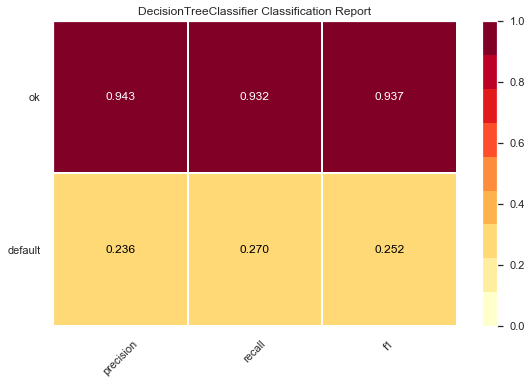

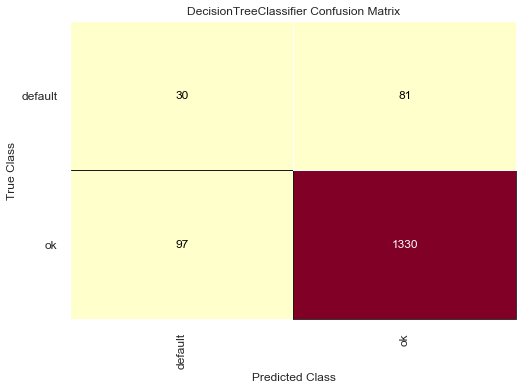

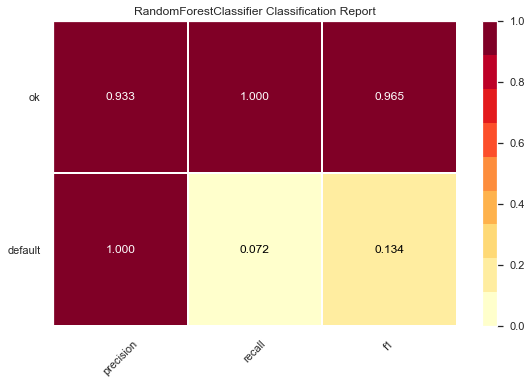

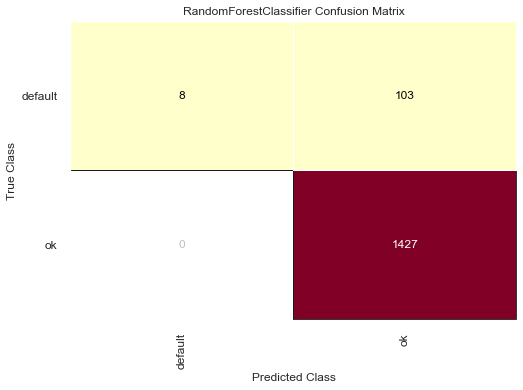

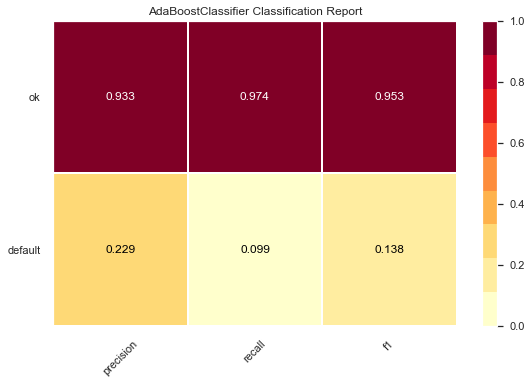

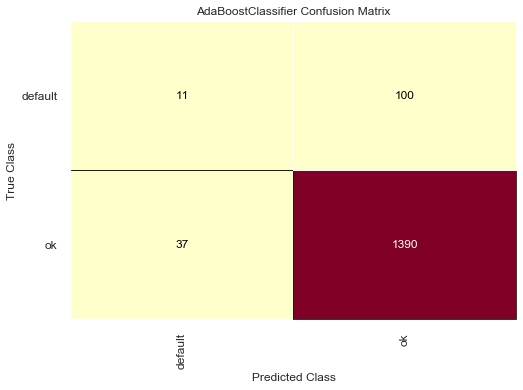

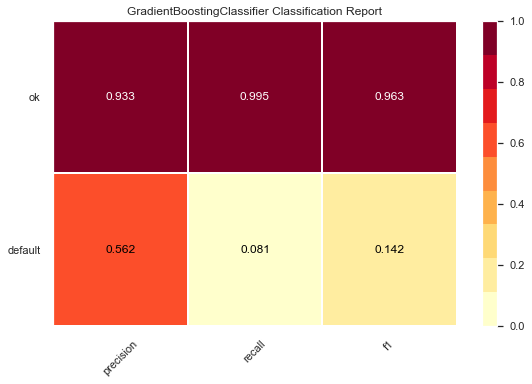

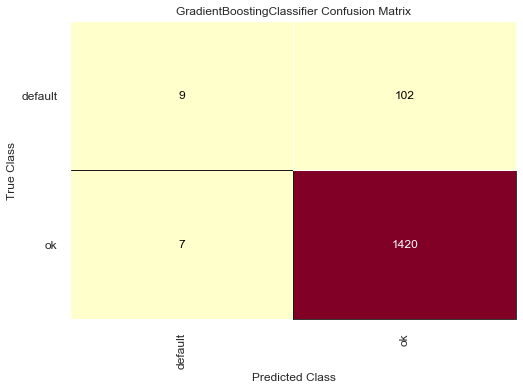

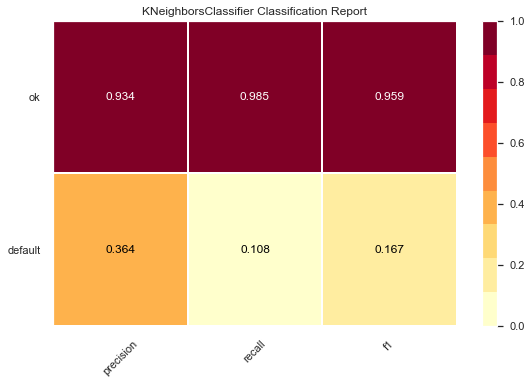

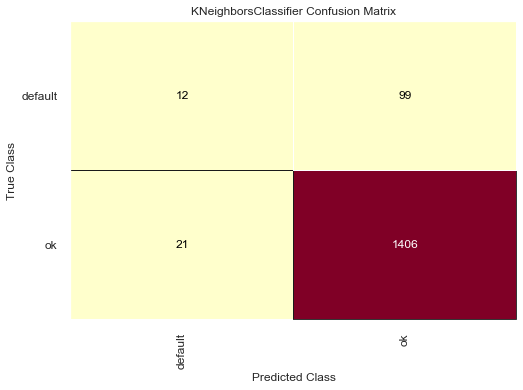

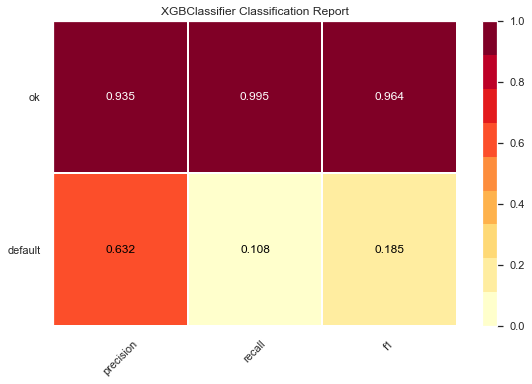

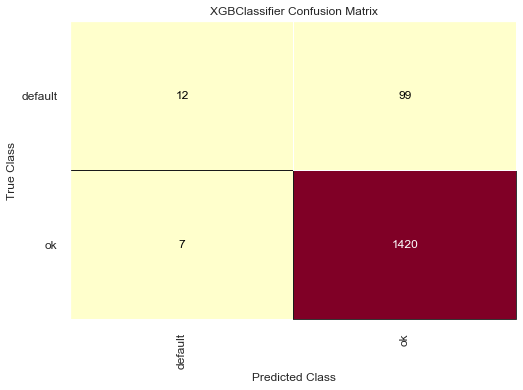

In [29]:
classifiers = [dt, rf, ada, gbc, knn,xgb]

sets = [valid,] #test]

for classifier in classifiers:
    for test_set in sets:
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
        pipe.fit(train[baseline_features], train.loan_status)   

        target_names = ['default','ok']

        #ClassificationReport
        visualizer = ClassificationReport(pipe, classes=target_names)
        visualizer.fit(train[baseline_features], train.loan_status)
        visualizer.score(test_set[baseline_features], test_set.loan_status)
        visualizer.show()

        ##Confusion matrix
        cm = ConfusionMatrix(pipe, classes=target_names)
        cm.fit(train[baseline_features], train.loan_status)
        cm.score(test_set[baseline_features], test_set.loan_status)
        cm.show()
        

### Baseline model with balancing data 

In [55]:
from imblearn.over_sampling import RandomOverSampler, SMOTENC, SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline

#sm = SMOTE(random_state=42)
#smoteenn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
ros = RandomOverSampler()
X_train, y_train= ros.fit_resample(train[baseline_features], train.loan_status)

Text(0.5, 1.0, 'After balancing (Loan status)')

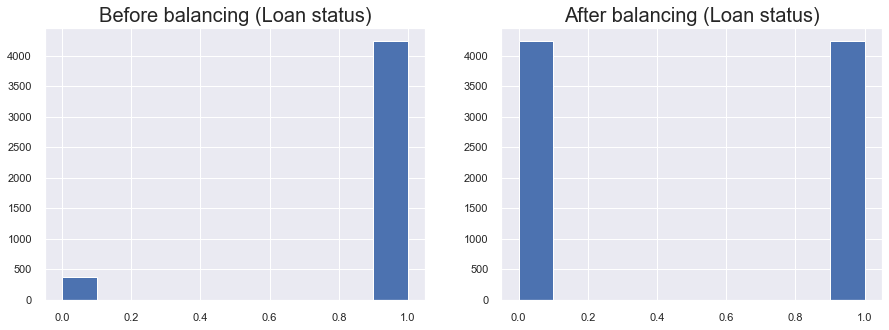

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
train.loan_status.hist().set_title('Before balancing (Loan status)', fontsize=20)
plt.subplot(1,2,2)
y_train.hist().set_title('After balancing (Loan status)', fontsize=20)

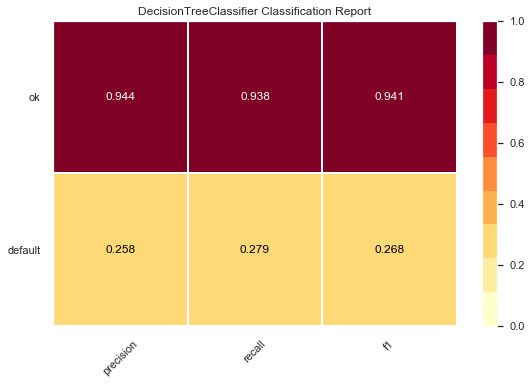

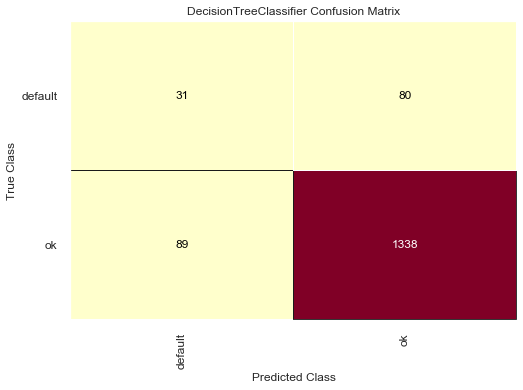

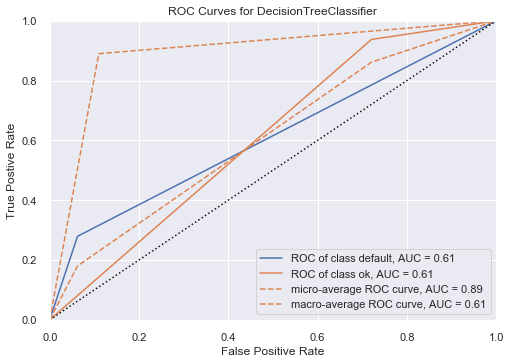

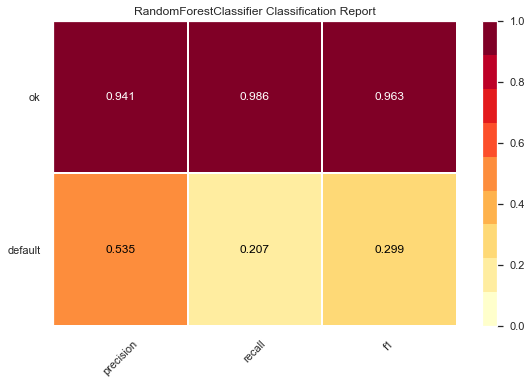

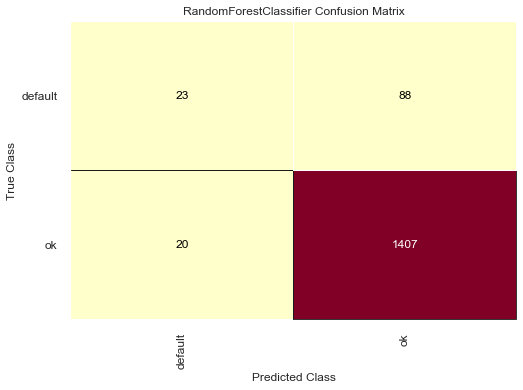

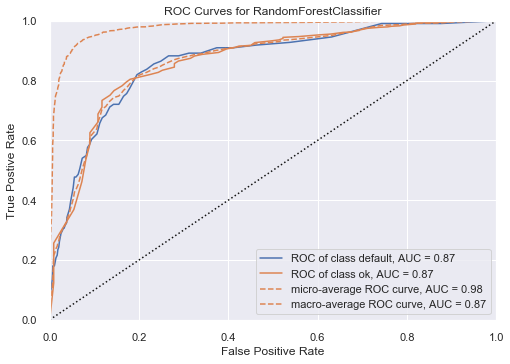

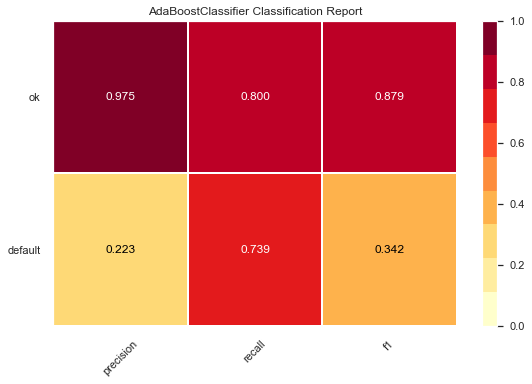

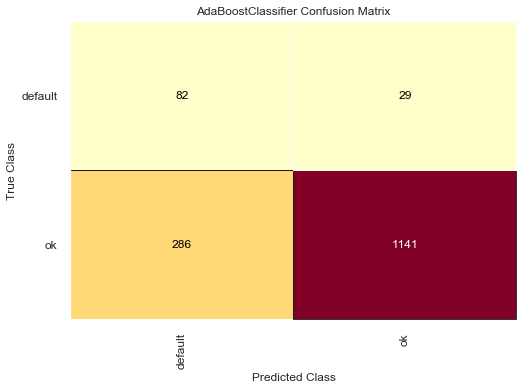

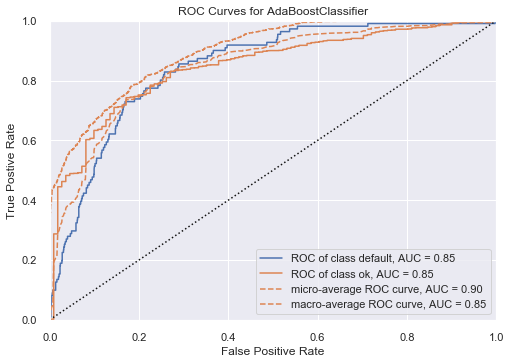

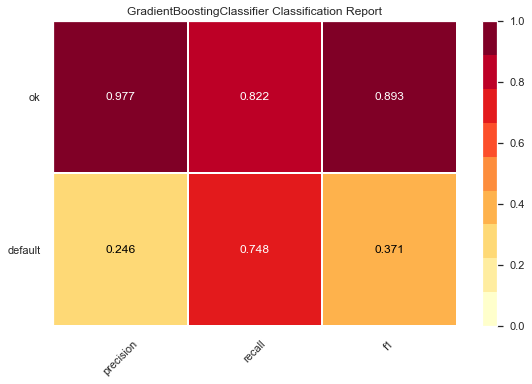

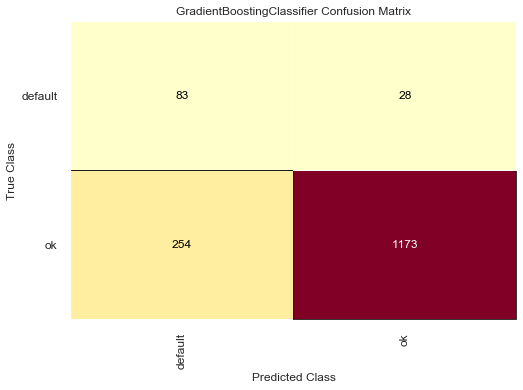

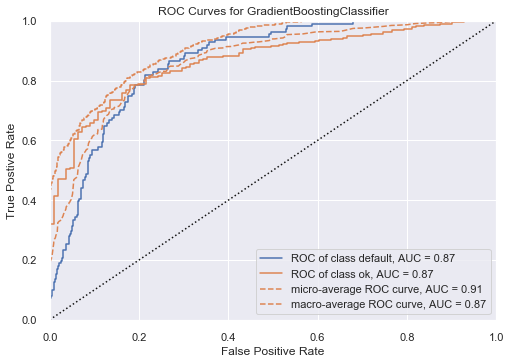

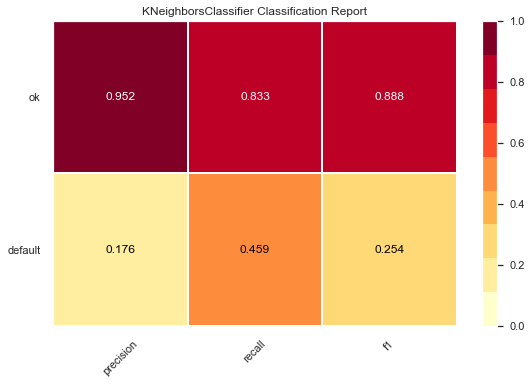

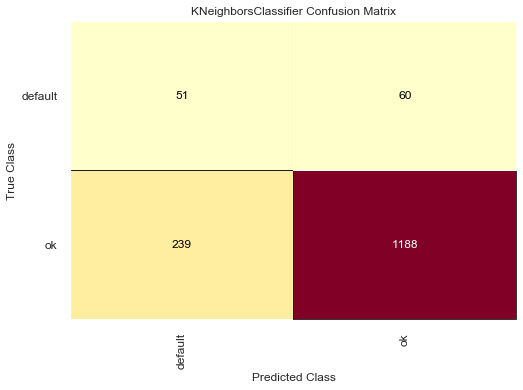

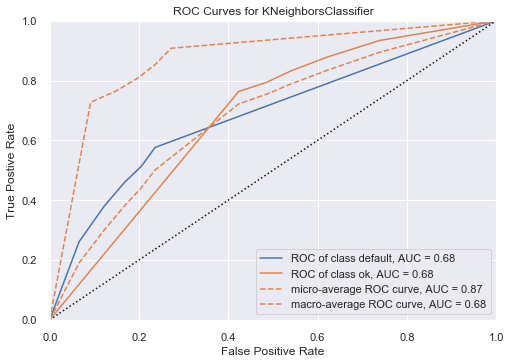

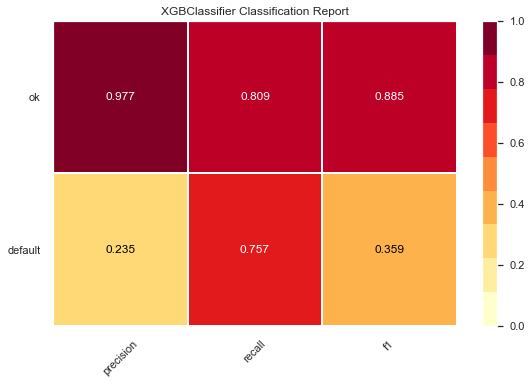

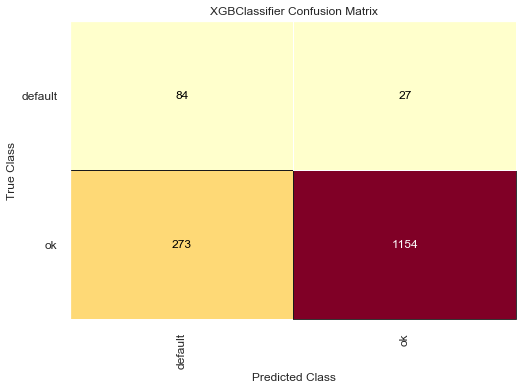

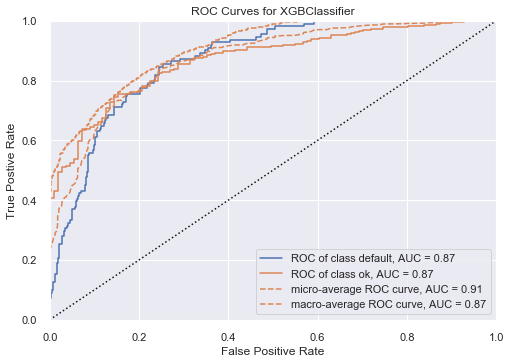

In [57]:
#selection of Categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

sets = [valid] #,test]

for classifier in classifiers:
    for test_set in sets:
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier),
                         ])
        pipe.fit(X_train, y_train)
                        
        
        visualizer = ClassificationReport(pipe, classes=target_names)
        visualizer.fit(X_train, y_train)
        visualizer.score(test_set[baseline_features], test_set.loan_status)
        visualizer.show()
        
     
        #Confusion matrix
        cm = ConfusionMatrix(pipe, classes=target_names)
        cm.fit(X_train, y_train)
        cm.score(test_set[baseline_features], test_set.loan_status)
        cm.show()
        
        target_names = ['default','ok']
        
        #ROCAUC
        visualizer = ROCAUC(pipe, classes=target_names)
        visualizer.fit(X_train, y_train)        
        visualizer.score(test_set[baseline_features], test_set.loan_status)        
        visualizer.show()   
        
        y_pred = pipe.predict(test_set[baseline_features])

## Baseline model ensembling

Dataset: Validation
Voting method: hard


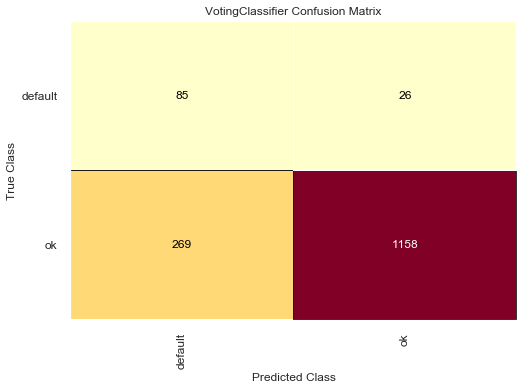

Dataset: Validation
Voting method: soft


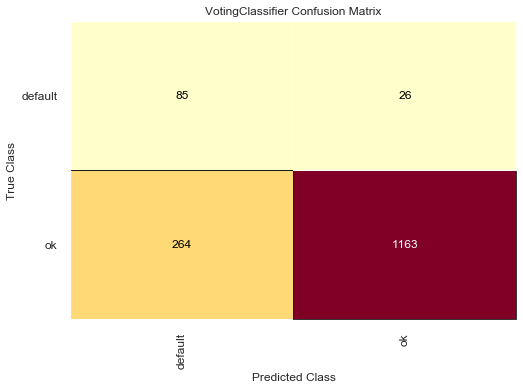

Dataset:Test
Voting method: hard


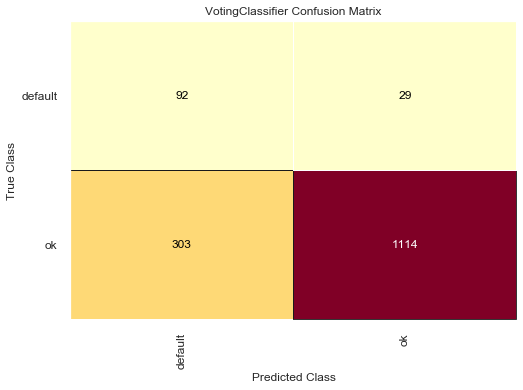

Dataset:Test
Voting method: soft


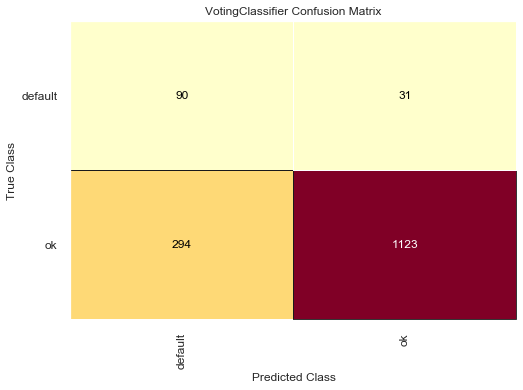

In [58]:
from sklearn.ensemble import VotingClassifier

estimators=[('xgb',xgb),('ada', ada), ('gbc', gbc), ] 

votes = ['hard','soft']

'''
hard - uses predicted class labels for majority rule voting.
soft - very individual classifier provides a probability value that a specific data point belongs to a particular target class,
      predictions are weighted by the classifier's importance and summed up
'''

sets = [valid,test]

num = 0

for test_set in sets:
    for vote in votes:
        
        #print set name
        if num == 0 or num == 1:
            print('Dataset: Validation')
        else:
            print('Dataset:Test')
        num += 1
        
        print('Voting method:',vote,)
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', VotingClassifier(estimators, voting=vote))])
        pipe.fit(X_train, y_train)   

        #Confusion matrix
        cm = ConfusionMatrix(pipe, classes=target_names)
        cm.fit(X_train, y_train)
        cm.score(test_set[baseline_features], test_set.loan_status)
        cm.show()

## Parameter Tuninnig (on Imbalanced Data)
- Because tuninig after balancing data with RandomOverSampling technique, unbalanced data is duplicated, model learns to pick defaulting values and no proper tuninig can happen. 

### Custom scoring function to reduce False Positives (Defaults)
- XGB
- GBC
- ADA

In [340]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Custom Scoring Function
def my_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp
my_scoring_func = make_scorer(my_scorer, greater_is_better=False)

Wall time: 0 ns
Wall time: 20h 58min 1s
{'clf__learning_rate': 1, 'clf__max_depth': 1, 'clf__min_child_weight': 1, 'clf__n_estimators': 200, 'clf__n_jobs': -1, 'clf__reg_alpha': 1, 'clf__reg_lambda': 0, 'clf__subsample': 0.1}
Wall time: 0 ns

 XGBoost model


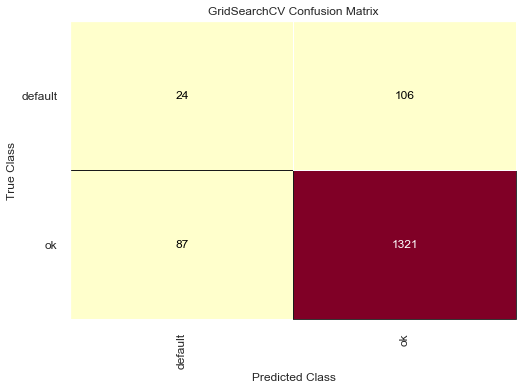

In [365]:
#XGB Paremeter tuninig
learning_rate =[0.1,0.3,0.5,0.7,1] #0.3,0.5,] #0.7,1]
n_estimators=[50,100,200,300,500] #,200] #300,500,900] #,750,900,1000,1300,1500] 
max_depth=[1,3,6,9,10]
min_child_weight=[1,3,6,9,12]
subsample = [0.1,0.3,0.5,0.8,1]
reg_lambda = [0,1] 
reg_alpha = [0,1] 
n_jobs=-1,

              
parameters = {'clf__learning_rate': learning_rate,
              'clf__max_depth': max_depth,
              'clf__min_child_weight': min_child_weight,
              'clf__subsample': subsample,
               'clf__reg_lambda': reg_lambda,
               'clf__reg_alpha': reg_alpha,
              'clf__n_estimators':n_estimators,
              'clf__n_jobs':n_jobs,
             }


pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', xgb)])


%time rg_cv = GridSearchCV(pipe, parameters, scoring=my_scoring_func, ) 
%time rg_cv.fit(train[baseline_features], train.loan_status)
%time print(rg_cv.best_params_)


#Confusion matrix
print('\n XGBoost model')
cm = ConfusionMatrix(rg_cv, classes=target_names)
cm.fit(train[baseline_features], train.loan_status)
cm.score(valid[baseline_features], valid.loan_status)
cm.show()

{'clf__learning_rate': 0.5, 'clf__max_depth': 1, 'clf__n_estimators': 1300}

 GBC model


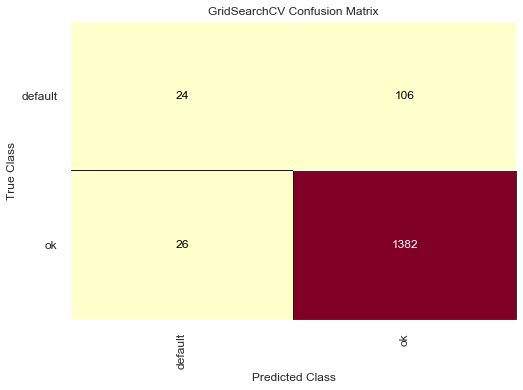

In [347]:
#GBC Paremeter tuninig
n_estimators = [100,300,500,900,1300]
learning_rate=[0.1,0.3,0.5,]
max_depth=[1,3,6]
#max_features=[None,'auto','sqrt','log2']  
#criterion=['friedman_mse','mse', 'mae'] 

              
parameters = {'clf__n_estimators':n_estimators,
              'clf__learning_rate': learning_rate,
              'clf__max_depth': max_depth,
              #'clf__max_features': max_features,
              #'clf__criterion': criterion,
             }


pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', gbc)])


rg_cv = GridSearchCV(pipe, parameters, scoring=my_scoring_func, n_jobs = -1)
rg_cv.fit(train[baseline_features], train.loan_status)
print(rg_cv.best_params_)


#Confusion matrix
print('\n GBC model')
cm = ConfusionMatrix(rg_cv, classes=target_names)
cm.fit(train[baseline_features], train.loan_status)
cm.score(valid[baseline_features], valid.loan_status)
cm.show()

{'clf__learning_rate': 0.5, 'clf__n_estimators': 600}

 ADA model


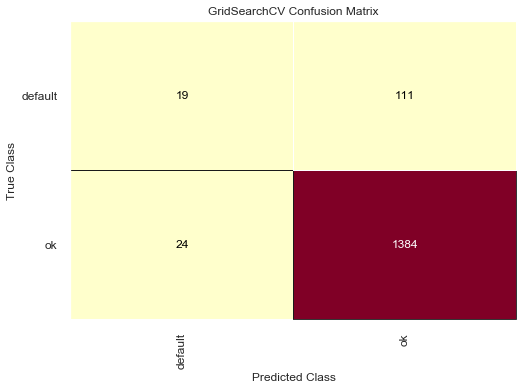

In [346]:
#Ada Paremeter tuninig
n_estimators = [50,100,200,300,600,750,1000]
learning_rate=[0.1,0.3,0.4,0.5,0.55,0.6]
      
parameters = {'clf__n_estimators':n_estimators,
              'clf__learning_rate': learning_rate,
             }


pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', ada)])


Frg_cv = GridSearchCV(pipe, parameters, scoring=my_scoring_func, n_jobs = -1)
rg_cv.fit(train[baseline_features], train.loan_status)
print(rg_cv.best_params_)


#Confusion matrix
print('\n ADA model')
cm = ConfusionMatrix(rg_cv, classes=target_names)
cm.fit(train[baseline_features], train.loan_status)
cm.score(valid[baseline_features], valid.loan_status)
cm.show()

In [63]:
grid = {'learning_rate': 1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 200, 
        'n_jobs': -1, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.1}
xgb.set_params(**grid)

grid2 = {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 1300}
gbc.set_params(**grid2)

grid3 = {'learning_rate': 0.5, 'n_estimators': 600}
ada.set_params(**grid3)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=600, random_state=None)

## Better model building

- Do feature preprocessing.
- Build a machine learning model.
- Explore your model results.
- Compare multiple machine learning models.
- Do hyperparameter tuning.
- Use a pipeline
- Data imputation etc.
- Analyse feature importance in models

### Baseline Features + Some new features

* 'quarter'
* 'dayofweek'
* 'is_weekend'
* 'dayofmonth'
* 'dayofyear'
* 'week_number'
* 'season_number'
* 'is_holiday'
* 'age_group'
* 'credit_score_gender'
* 'credit_score_education'
* 'credit_score_marital_status'
* 'credit_score_marital_status',
* 'gender_education'
* 'gender_marital_status'
* 'education_marital_status'

In [59]:
features = ['listing_category','credit_score','loan_amount','loan_period','effective_rate','monthly_installment',
            'gender','age','education','employment_status','employ_how_long','dependants',
            'marital_status','monthly_income','available_income','dti','year','month', 
            'quarter', 'dayofweek', 'is_weekend', 'dayofmonth', 'dayofyear',
            'week_number','season_number','is_holiday','age_group', 'credit_score_gender',
            'credit_score_education','credit_score_marital_status', 'gender_education',
            'gender_marital_status','education_marital_status']

target = ['loan_status']

### Balance train dataset

In [64]:
ros2 = RandomOverSampler()
X, y = ros2.fit_resample(train[features], train.loan_status)

### Preprocessing with Pipelines

In [65]:
#selection of Categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

## Model selection with Pipelines

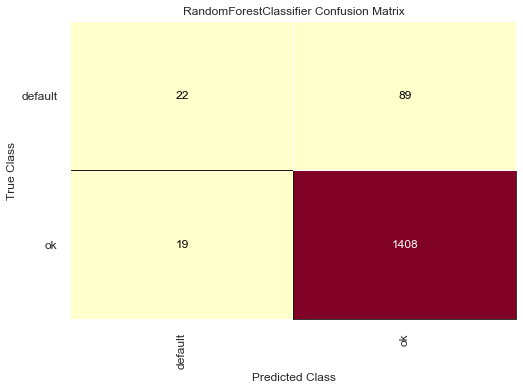

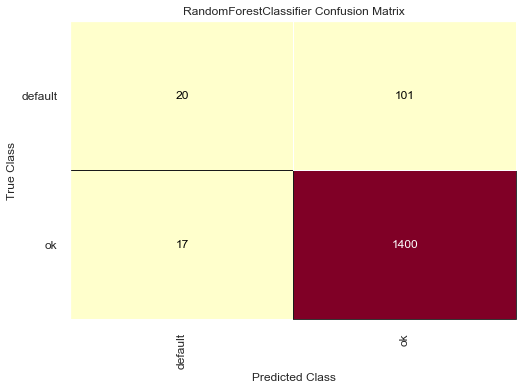

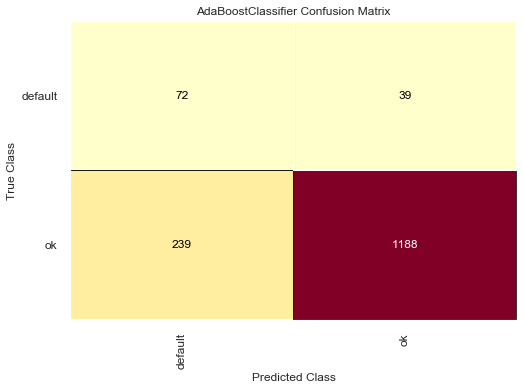

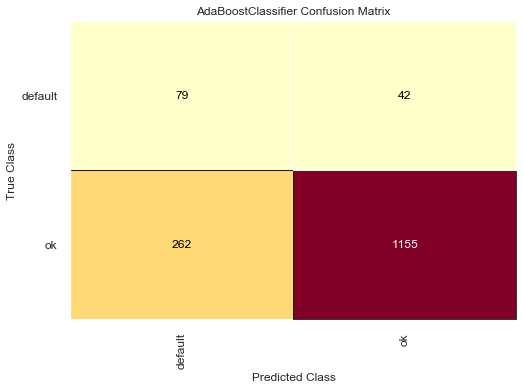

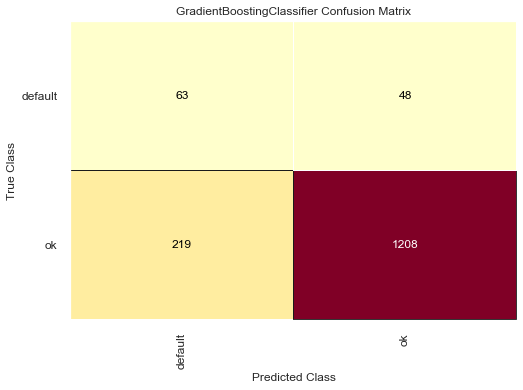

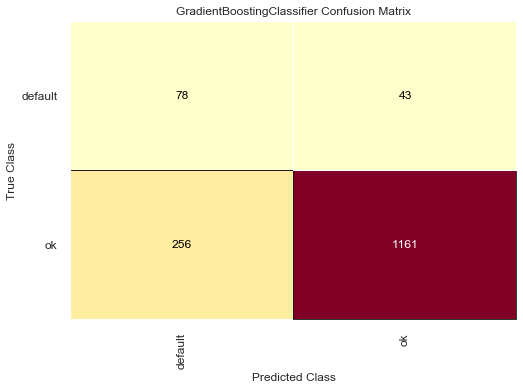

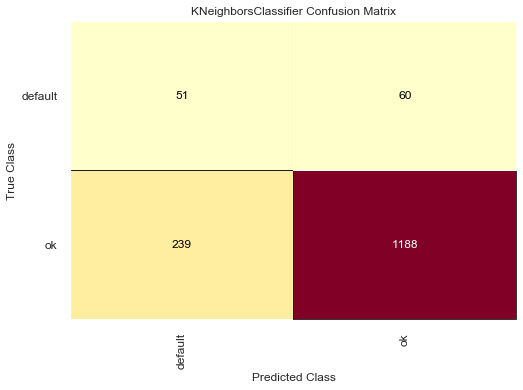

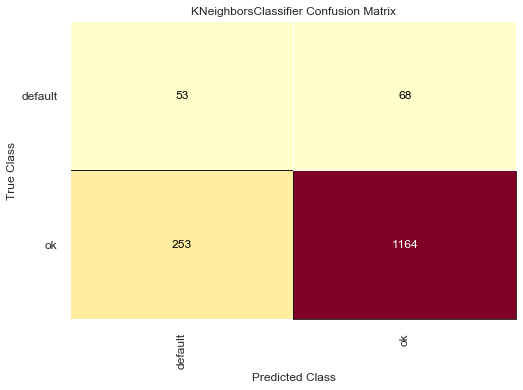

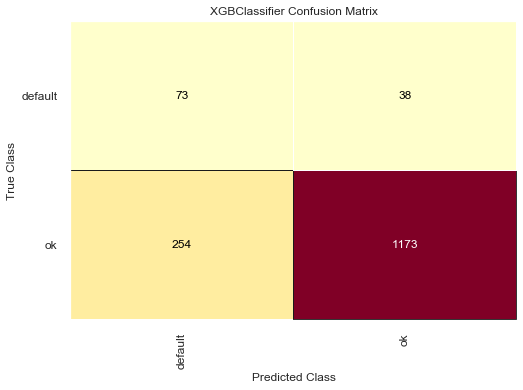

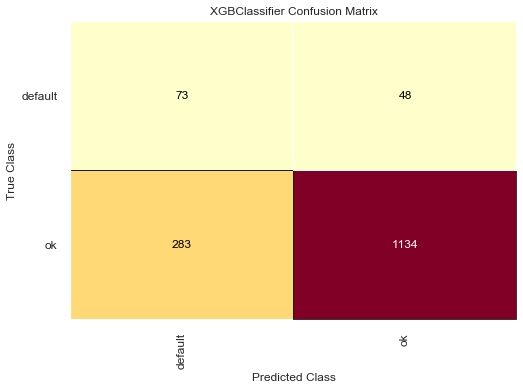

In [66]:
classifiers = [rf, ada, gbc, knn, xgb]
test_set = [valid, test]

for classifier in classifiers:
    for test_set in sets:
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
        pipe.fit(X, y) 
        
        '''
        #ClassificationReport
        visualizer = ClassificationReport(pipe, classes=target_names)
        visualizer.fit(X, y)
        visualizer.score(test_set[features], test_set.loan_status)
        visualizer.show()'''
        
        #Confusion matrix
        cm = ConfusionMatrix(pipe, classes=target_names)
        cm.fit(X,y)
        cm.score(test_set[features], test_set.loan_status)
        cm.show()

## Default parameters are better, than tuned

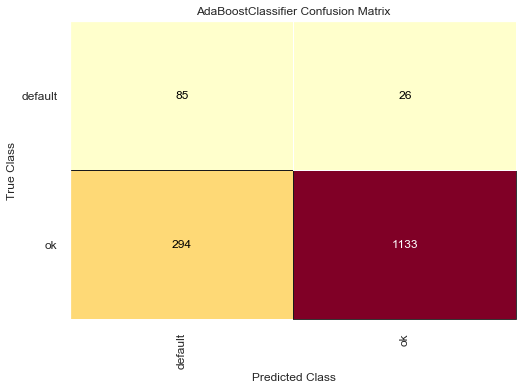

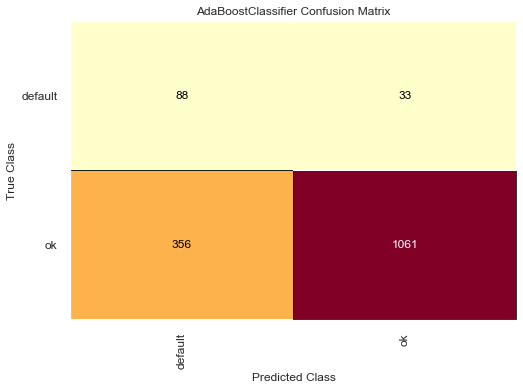

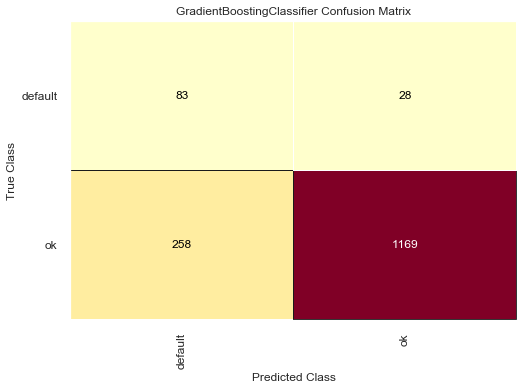

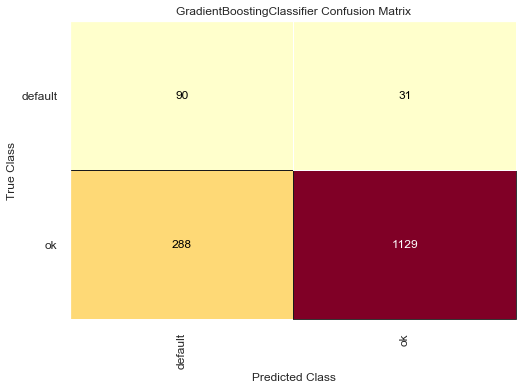

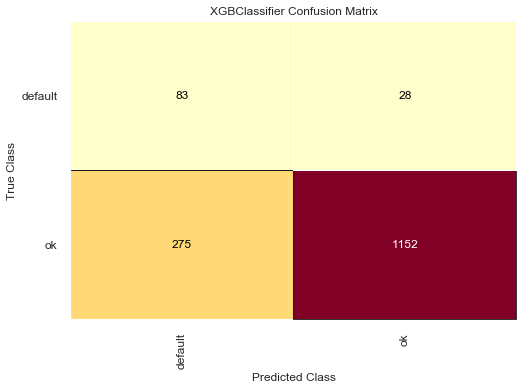

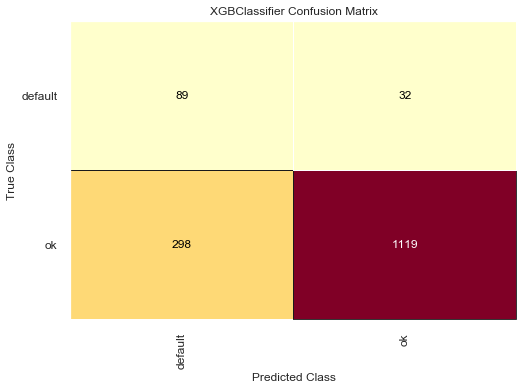

In [67]:
#innitialize models
import xgboost as xgb2

ada2 = AdaBoostClassifier()
gbc2 = GradientBoostingClassifier()
xgb2 = xgb2.XGBClassifier()

classifiers = [ada2, gbc2, xgb2]
test_set = [valid, test]

for classifier in classifiers:
    for test_set in sets:
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
        pipe.fit(X, y) 
        '''
        #ClassificationReport
        visualizer = ClassificationReport(pipe, classes=target_names)
        visualizer.fit(X, y)
        visualizer.score(test_set[features], test_set.loan_status)
        visualizer.show()'''
        
        #Confusion matrix
        cm = ConfusionMatrix(pipe, classes=target_names)
        cm.fit(X,y)
        cm.score(test_set[features], test_set.loan_status)
        cm.show()

## Feature importance

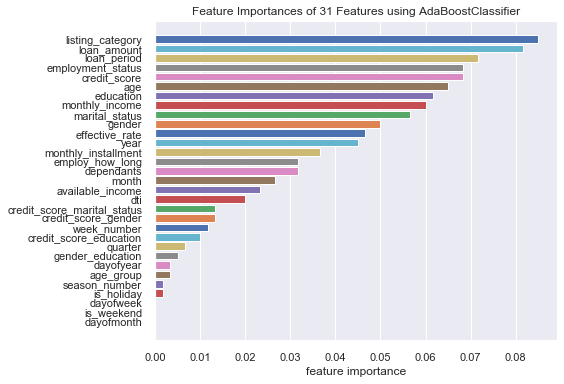

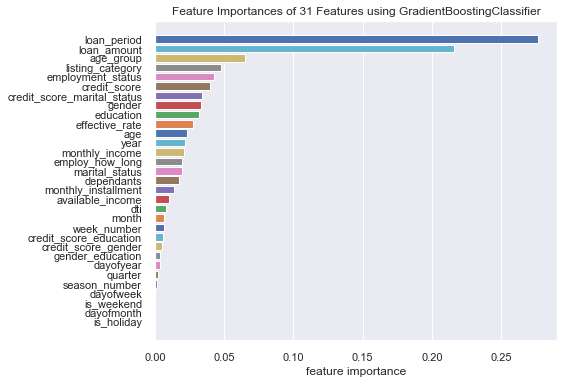

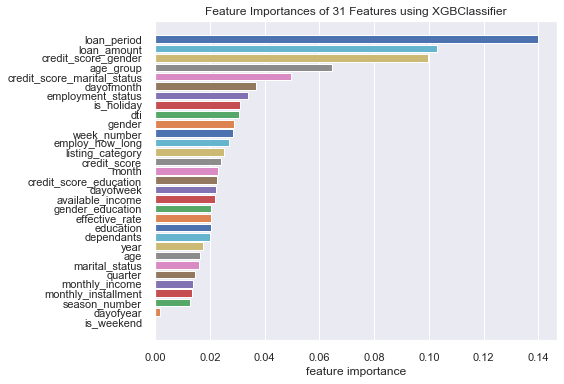

In [501]:
#selection of Categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Adjusted categorical to ordinal for simpliear FE explanation
categorical_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder()),
    #('one_hot', OneHotEncoder(handle_unknown='ignore'))
    ])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('normalizer',Normalizer())])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


classifiers = [ada, gbc, xgb2]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])

    pipe.fit(X,y)

    viz = FeatureImportances(pipe.steps[1][1],relative=False)
    viz.fit(X, y)
    viz.show()

## Top features

In [68]:
top_feat = ['creation_date','listing_category','credit_score','loan_amount','loan_period','effective_rate',
 'monthly_installment','gender','education','employment_status','dependants','marital_status',
 'monthly_income','available_income','dti','year','dayofweek_name','season','season_number','is_holiday',
 'age_group','credit_score_gender','credit_score_education','gender_education','gender_marital_status',
 'education_marital_status']

In [69]:
#Balance data
ros2 = RandomOverSampler()
X, y = ros2.fit_resample(train[top_feat], train.loan_status)

In [70]:
#selection of Categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

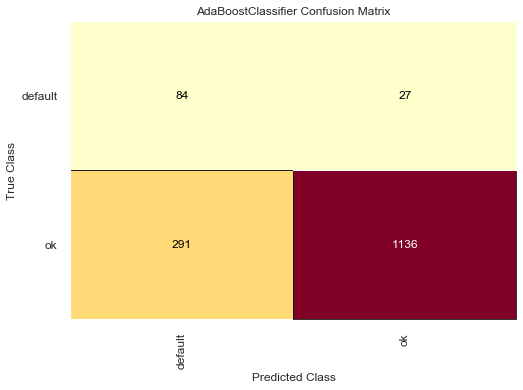

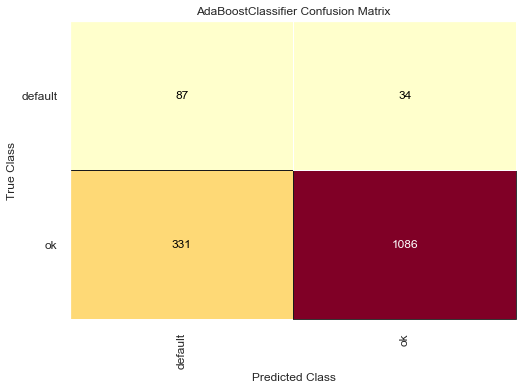

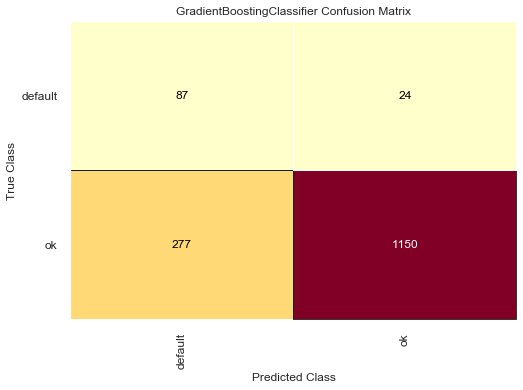

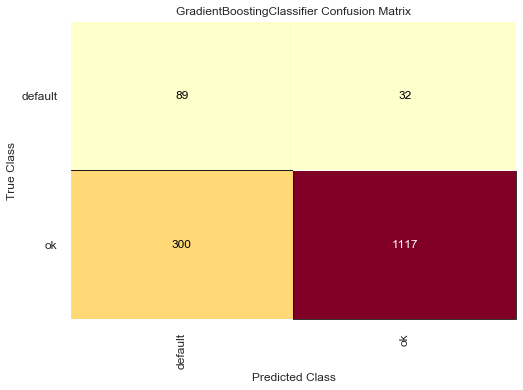

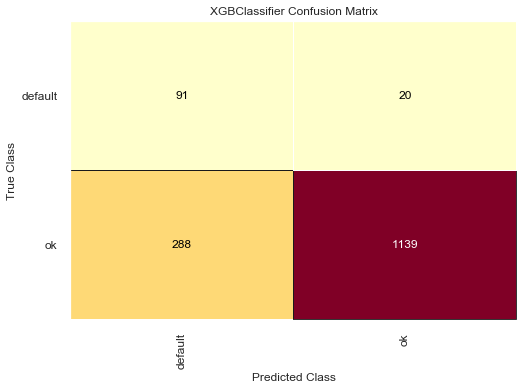

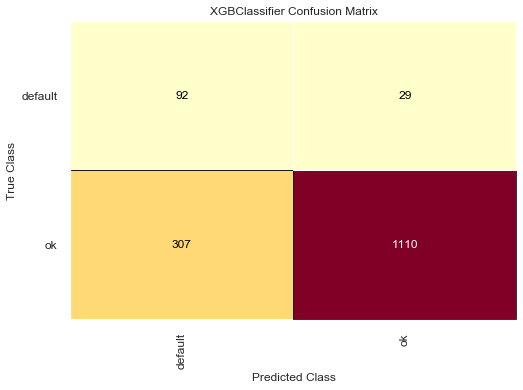

In [72]:

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('normalizer',Normalizer())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    #('ordinal_encoder', OrdinalEncoder()),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
    ])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

classifiers = [ada2,gbc2,xgb2]
test_set = [valid, test]


for classifier in classifiers:
    for test_set in sets:
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
        pipe.fit(X, y)   
        '''
        #classification Report
        visualizer = ClassificationReport(pipe, classes=target_names)
        visualizer.fit(X, y)
        visualizer.score(test_set[top_feat], test_set.loan_status)
        visualizer.show()'''
        
        #Confusion matrix
        cm = ConfusionMatrix(pipe, classes=target_names)
        cm.fit(X,y)
        cm.score(test_set[top_feat], test_set.loan_status)
        cm.show()

### Ensembling multiple models for classification (RF, ADA, GBC) - VotingClassifier

Dataset: Validation
Voting method: hard


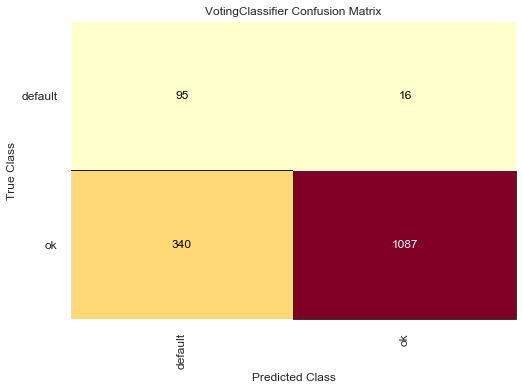

Dataset: Validation
Voting method: soft


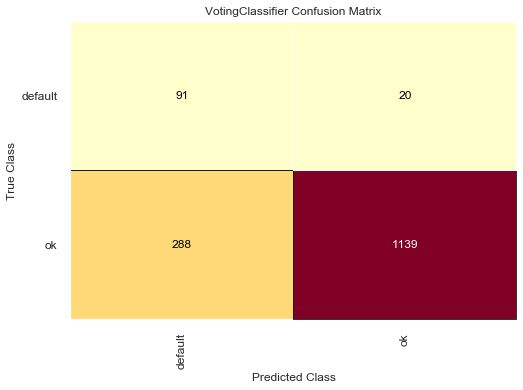

Dataset:Test
Voting method: hard


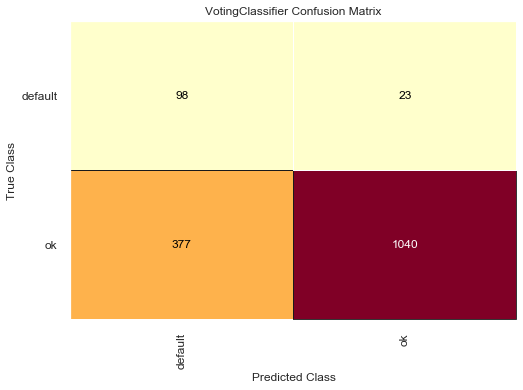

Dataset:Test
Voting method: soft


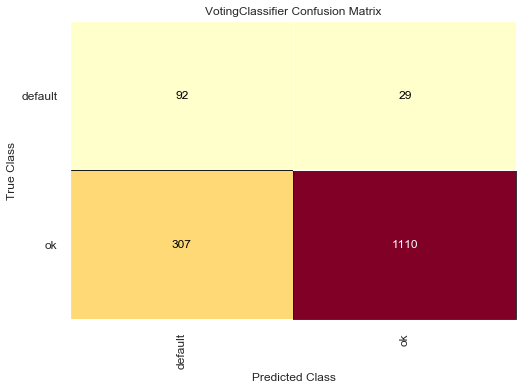

In [73]:
from sklearn.ensemble import VotingClassifier
estimators=[('xgb', xgb2), ('ada', ada2),]# ('gbc', gbc2)]

votes = ['hard','soft']
'''
hard - uses predicted class labels for majority rule voting.
soft - very individual classifier provides a probability value that a specific data point belongs to a particular target class,
      predictions are weighted by the classifier's importance and summed up
'''

sets = [valid,test]
num = 0

for test_set in sets:
    for vote in votes:
        
        #print set name
        if num == 0 or num == 1:
            print('Dataset: Validation')
        else:
            print('Dataset:Test')
        num += 1
        
        print('Voting method:',vote,)
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', VotingClassifier(estimators, voting=vote))])
        pipe.fit(X, y)   

        #Confusion matrix
        cm = ConfusionMatrix(pipe, classes=target_names)
        cm.fit(X, y)
        cm.score(test_set[top_feat], test_set.loan_status)
        cm.show()
        

## Save and Loading a machine learning model into/from a file

Some resoucres on saving:
* https://www.geeksforgeeks.org/saving-a-machine-learning-model/
* https://www.mikulskibartosz.name/how-to-save-a-machine-learning-model-into-a-file/
* https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [74]:
#final model chosen is VottinClassifier of Ada, XGB with 'Hard'
votingmodelhard = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', VotingClassifier(estimators, voting='hard'))]) 

votingmodelhard.fit(df[top_feat],df.loan_status)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('normalizer',
                                                                   Normalizer(copy=True,
                                                                              norm='l2'))],
   

In [75]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(votingmodelhard) 
  
# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
model_from_pickle.predict(test[top_feat]) 

array(['ok', 'ok', 'ok', ..., 'ok', 'ok', 'ok'], dtype=object)

In [78]:
#Save to pickled file using joblib –
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(votingmodelhard, 'Finbeep2pmodel.pkl') 
  
# Load the model from the file 
model_from_joblib = joblib.load('Finbeep2pmodel.pkl')  

In [79]:
valid[top_feat].to_csv('validation.csv',index=False)

In [80]:
# Use the loaded model to make predictions 
model_from_joblib.predict(valid[top_feat]) 

array(['ok', 'ok', 'ok', ..., 'ok', 'ok', 'ok'], dtype=object)

## Suggestions
1. Gather more data, potentially from other p2p lending platforms in Lithuania
2. Train models with more data for training, fewer for testing?

## Comments to finbee.lt
1. Would be nice to have more recent data
2. Some data is definitely collected wrongly (years_working_in_total,monthly_expenses,outstanding_debts)